In [1]:
import os, sys
print(sys.executable) # works this time
print(sys.version)
print(sys.version_info)
import scanpy as sc
from sklearn.cross_decomposition import CCA
from sklearn.manifold import TSNE
from scipy.sparse import csr_matrix
from scipy.sparse import csr_matrix
import numpy as np
import umap.umap_ as umap
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pandas as pd
import random

I:\mutiomics\pythonProject\.venv\Scripts\python.exe
3.10.11 (tags/v3.10.11:7d4cc5a, Apr  5 2023, 00:38:17) [MSC v.1929 64 bit (AMD64)]
sys.version_info(major=3, minor=10, micro=11, releaselevel='final', serial=0)


In [2]:
adata1 = sc.read_h5ad("I:\\mutiomics\\Spatial Multimodal Analysis of Transcriptomes and Metabolomes in Tissues\\m1\\m1_FMP_VisiumArray2.h5ad")
adata2 = sc.read_h5ad("I:\\mutiomics\\Spatial Multimodal Analysis of Transcriptomes and Metabolomes in Tissues\\m1\\m1_visium_FMP2.h5ad")

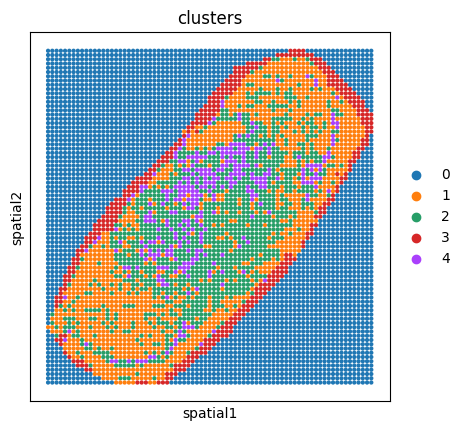

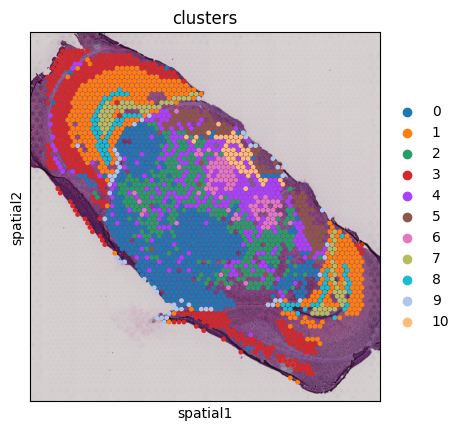

In [3]:
sc.pl.spatial(adata1, img_key = "hires", color="clusters", spot_size=1)
sc.pl.spatial(adata2, img_key = "hires", color="clusters", size=1.5)

In [5]:
adata1.obs["leiden"] = adata1.obs["clusters"]
adata2.obs["leiden"] = adata2.obs["clusters"]
idx_to_remove = adata1.obs["clusters"][adata1.obs["clusters"] == "0"]
keep_cells_mask = ~adata1.obs.index.isin(idx_to_remove.index)
adata1 = adata1[keep_cells_mask, :]
print(adata2)
print(adata1)
print(idx_to_remove.index)

AnnData object with n_obs × n_vars = 2278 × 14319
    obs: 'in_tissue', 'array_row', 'array_col', 'mt_frac', 'total_counts', 'n_counts', 'n_genes', 'clusters', 'leiden'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'clusters', 'clusters_colors', 'hvg', 'log1p', 'neighbors', 'pca', 'spatial', 'umap'
    obsm: 'X_pca', 'X_umap', 'spatial'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'
View of AnnData object with n_obs × n_vars = 3278 × 1538
    obs: 'clusters', 'leiden'
    var: 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'clusters', 'clusters_colors', 'hvg', 'log1p', 'neighbors', 'pca', 'umap'
    obsm: 'X_pca', 'X_umap', 'spatial'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'
Index([], dtype='object')


C:\Users\28123\AppData\Local\Temp\ipykernel_12544\2788546665.py:1: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata1.obs["leiden"] = adata1.obs["clusters"]


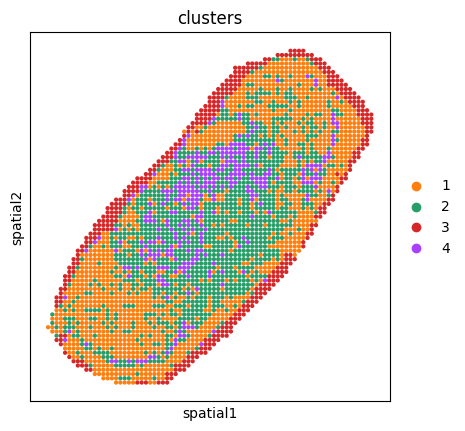

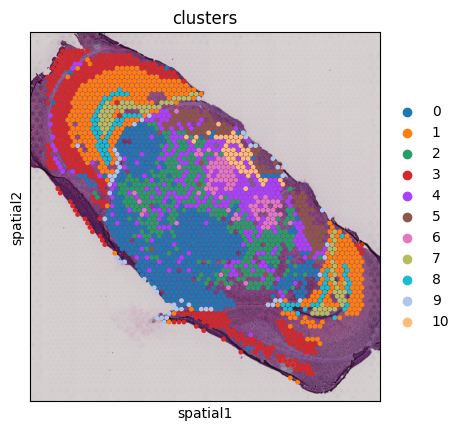

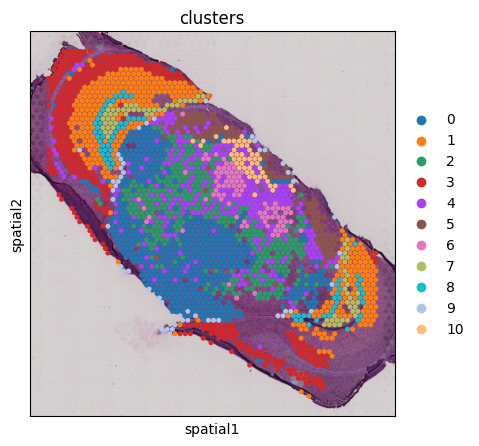

In [57]:
import matplotlib.pyplot as plt
sc.pl.spatial(adata1, img_key = "hires", color="clusters", spot_size=1, show=False)
#plt.savefig("I:\\mutiomics\\Spatial Multimodal Analysis of Transcriptomes and Metabolomes in Tissues\\m1\\m1_FMP_VisiumArray_plot.pdf")
sc.pl.spatial(adata2, img_key = "hires", color="clusters", size=1.5, show=False,return_fig=True)
#plt.savefig("I:\\mutiomics\\Spatial Multimodal Analysis of Transcriptomes and Metabolomes in Tissues\\m1\\m1_visium_FMP.pdf")
fig, ax = plt.subplots(figsize=(5, 5), dpi=100)  # 5 inches * 100 dpi = 500 pixels

# 在创建的轴对象上绘图
sc.pl.spatial(adata2, img_key="hires", color="clusters", size=1.5, show=False, ax=ax)

# 现在，图像已经绘制在 ax 上，你可以随意操作它
# 保存为变量
spatial_plot = fig

# 如果你想显示它，可以使用 plt.show()
plt.show()


In [6]:
data1_pca_results = adata1.obsm['spatial']  # PCA 结果
pca_leiden = adata1.obs["leiden"]
data1_leiden_str = pca_leiden.to_numpy()

data2_pca_results = adata2.obsm['X_umap']  # PCA 结果
pca_leiden = adata2.obs["leiden"]
data2_leiden_str = pca_leiden.to_numpy()


In [7]:
###casual run using neasrst indices
selected_indices = np.random.choice(range(3278 ), 2278 , replace=False)

In [8]:
#####spatial alignment of data3(metabolic) and data2(spatial) using CCA
def rotate_point_90_degrees(row):
    new_x = -row[0]
    new_y = row[1]
    return pd.Series({0: new_x, 1: new_y})

def flip_around_y_minus_x(row):
    new_x = -row[0]
    new_y = -row[1]
    return pd.Series({0: new_x, 1: new_y})

def flip_around_y_plus_x(row):
    new_x = row[1]
    new_y = row[0]
    return pd.Series({0: new_x, 1: new_y})

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(-100, 100))
selected_indices = np.random.choice(range(3084), 2220, replace=False)
data3_spatial_results = pd.DataFrame(adata1.obsm['spatial'])
scaled_data = scaler.fit_transform(data3_spatial_results)
data3_spatial_results = pd.DataFrame(scaled_data, columns=data3_spatial_results.columns)
print(data3_spatial_results.head)
data2_spatial_results = pd.DataFrame(adata2.obsm['spatial'])
scaled_data = scaler.fit_transform(data2_spatial_results)
data2_spatial_results = pd.DataFrame(scaled_data, columns=data3_spatial_results.columns)

data2_spatial_results=pd.DataFrame(data2_spatial_results)
data3_spatial_results=pd.DataFrame(data3_spatial_results)
data3_spatial_results = data3_spatial_results.apply(rotate_point_90_degrees, axis=1)
#data3_spatial_results = data3_spatial_results.apply(flip_around_y_minus_x, axis=1)
#data3_spatial_results = data3_spatial_results.apply(flip_around_y_plus_x, axis=1)
data1_spatial_results = data3_spatial_results.iloc[selected_indices,:]
data1_spatial_results=pd.DataFrame(data1_spatial_results)
data1_spatial_results = data1_spatial_results +100
data2_spatial_results = data2_spatial_results +100
data3_spatial_results = data3_spatial_results +100

<bound method NDFrame.head of                0          1
0    -100.000000  66.666667
1     -97.368421  58.974359
2     -97.368421  61.538462
3     -97.368421  64.102564
4     -97.368421  66.666667
...          ...        ...
3273  100.000000 -61.538462
3274  100.000000 -58.974359
3275  100.000000 -56.410256
3276  100.000000 -53.846154
3277  100.000000 -51.282051

[3278 rows x 2 columns]>


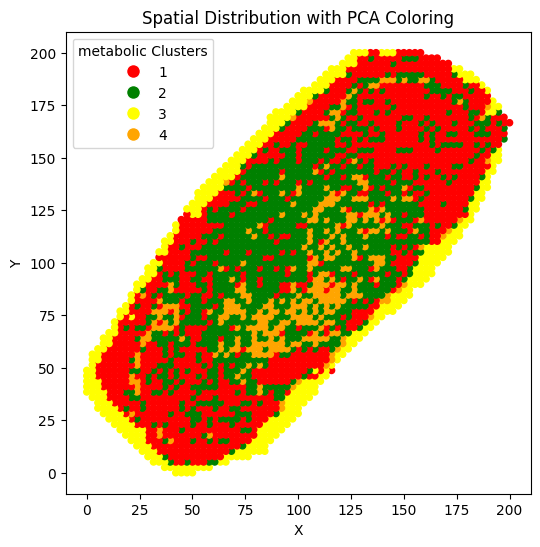

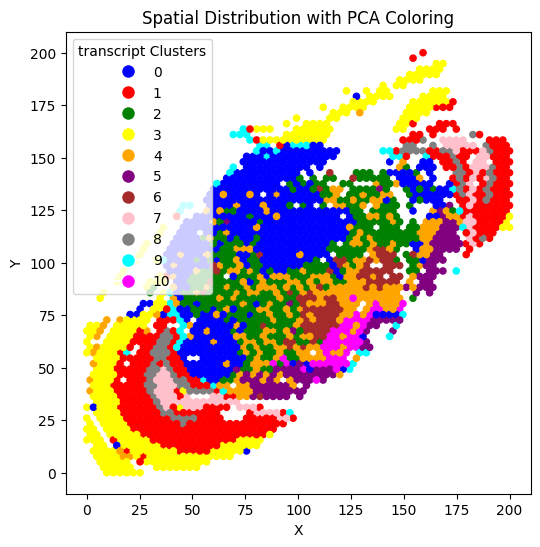

In [16]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6, 6))
unique_categories =np.unique(data1_leiden_str.astype(int))
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color_mapping[cat], markersize=10) for cat in unique_categories]
plt.scatter(data3_spatial_results.iloc[:, 0], data3_spatial_results.iloc[:, 1],  c=[color_mapping[category] for category in data1_leiden_str.astype(int)],s=20, alpha=1)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Spatial Distribution with PCA Coloring')
plt.legend(handles, unique_categories, title="metabolic Clusters")
plt.savefig("I:\\mutiomics\\Spatial Multimodal Analysis of Transcriptomes and Metabolomes in Tissues\\m1\\metabolic.pdf")
plt.show()
plt.figure(figsize=(6, 6))
unique_categories =np.unique(data2_leiden_str.astype(int))
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color_mapping[cat], markersize=10) for cat in unique_categories]
plt.scatter(data2_spatial_results.iloc[:, 0], data2_spatial_results.iloc[:, 1],  c=[color_mapping[category] for category in data2_leiden_str.astype(int)], s=20, alpha=1)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Spatial Distribution with PCA Coloring')
plt.legend(handles, unique_categories, title="transcript Clusters")
plt.savefig("I:\\mutiomics\\Spatial Multimodal Analysis of Transcriptomes and Metabolomes in Tissues\\m1\\transcript.pdf")
plt.show()

C:\Users\28123\AppData\Local\Temp\ipykernel_16000\3110813832.py:19: MatplotlibDeprecationWarning: The tostring_rgb function was deprecated in Matplotlib 3.8 and will be removed two minor releases later. Use buffer_rgba instead.
  image = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')


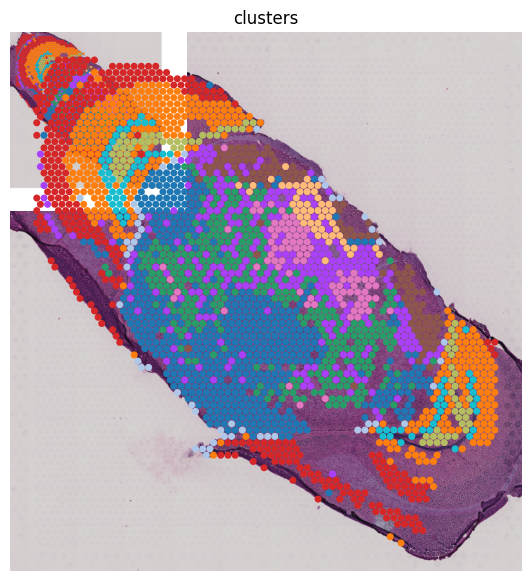

In [74]:
import scanpy as sc
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(figsize=(7, 7), dpi=100)  # 5 inches * 100 dpi = 500 pixels

# 在创建的轴对象上绘图
sc.pl.spatial(adata2, img_key="hires", color="clusters", size=1.5, show=False, ax=ax)

# 去除图例和坐标轴
ax.legend().set_visible(False)
ax.axis('off')

# 保存为变量
spatial_plot = fig

# 将图像渲染成图像数组
fig.canvas.draw()
image = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')
image = image.reshape(fig.canvas.get_width_height()[::-1] + (3,))

# 显示图像数组
plt.imshow(image)
plt.axis('off')  # 关闭坐标轴
plt.show()

plt.show()


C:\Users\28123\AppData\Local\Temp\ipykernel_16000\1565356247.py:37: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap(colormap)


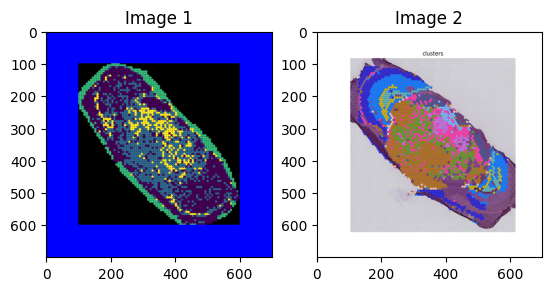

Transformation Matrix:
 [[ 0.95796895 -0.11138228 21.24696631]
 [ 0.04553929  0.98317911 -4.7671768 ]]


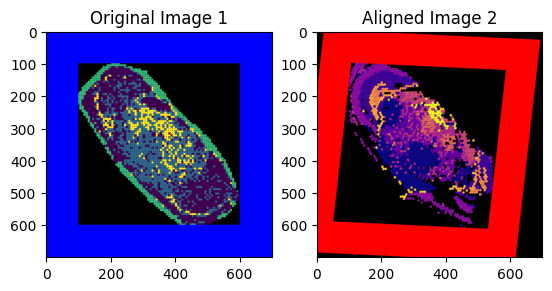

               0           1            2
0      31.140133    8.218950   621.465383
1     132.658986  107.237417  2225.363977
2      58.355809    9.726142  1197.783673
3     131.857272  133.878013  2052.424705
4     143.401097   92.949182  2539.824005
...          ...         ...          ...
2273   64.355228   54.188119  1066.908050
2274   86.367560   54.384209  1539.019158
2275   26.268456   59.778957   215.380230
2276  101.512027   68.052284  1784.735732
2277   67.560501   17.421121  1350.707408

[2278 rows x 3 columns]
               0           1
0     200.000000  166.666667
1     197.368421  158.974359
2     197.368421  161.538462
3     197.368421  164.102564
4     197.368421  166.666667
...          ...         ...
3273    0.000000   38.461538
3274    0.000000   41.025641
3275    0.000000   43.589744
3276    0.000000   46.153846
3277    0.000000   48.717949

[3278 rows x 2 columns]


<function matplotlib.pyplot.show(close=None, block=None)>

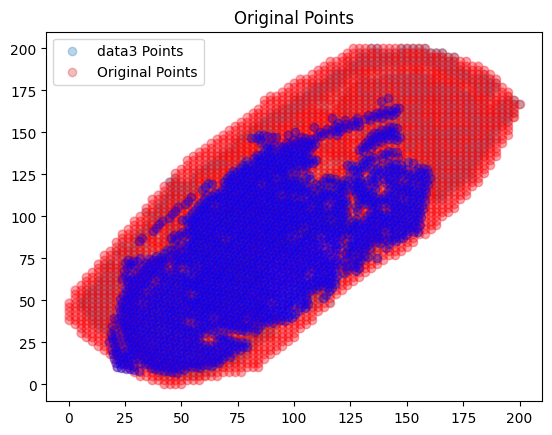

In [76]:
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

def create_image_from_data(data, width=500, height=500, dot_size=5, border_size=50, dot_colors=None, border_color=(0, 0, 0), colormap='viridis'):
    """
    Create an image from 2D data points with specified dot size, border size, and colors.

    Parameters:
    - data: 2D numpy array where data[0] contains x coordinates and data[1] contains y coordinates
    - width: Width of the image
    - height: Height of the image
    - dot_size: Size of the dots
    - border_size: Size of the border around the image
    - dot_colors: List of scalar values for each dot, which will be mapped to colors using a colormap
    - border_color: Color of the border (BGR format)
    - colormap: Colormap to use for mapping scalar values to colors
    
    Returns:
    - bordered_image: Image with data points and border
    """
    # Initialize an empty image with three channels for color
    image = np.zeros((height, width, 3), dtype=np.uint8)

    # Normalize data points to image dimensions
    x_norm = np.interp(data[0], (data[0].min(), data[0].max()), (0, width-1))
    y_norm = np.interp(data[1], (data[1].min(), data[1].max()), (0, height-1))

    # Normalize dot_colors to [0, 1] range
    if dot_colors is not None:
        norm = plt.Normalize(vmin=min(dot_colors), vmax=max(dot_colors))
        cmap = cm.get_cmap(colormap)
        mapped_colors = cmap(norm(dot_colors))
    else:
        color = (255, 255, 255)  # Default white color

    # Draw circles at normalized positions
    for i, (x, y) in enumerate(zip(x_norm, y_norm)):
        if dot_colors is not None:
            color = (mapped_colors[i][:3] * 255).astype(int)  # Convert to BGR format
            color = tuple(map(int, color[::-1]))  # Convert from RGB to BGR
        else:
            color = (255, 255, 255)  # Default white color
        cv2.circle(image, (int(x), int(y)), dot_size, color, -1)  # -1 means filled circle

    # Add border
    bordered_image = cv2.copyMakeBorder(image, border_size, border_size, border_size, border_size, 
                                        cv2.BORDER_CONSTANT, value=border_color)

    return bordered_image

# Simulated scalar values
dot_colors_1 = data1_leiden_str.astype(int)
dot_colors_2 = data2_leiden_str.astype(int)

# Create images
img1 = create_image_from_data(data3_spatial_results, width=500, height=500, dot_size=4, border_size=100, dot_colors=dot_colors_1, border_color=(255, 0, 0), colormap='viridis')
img3 = create_image_from_data(data2_spatial_results, width=500, height=500, dot_size=4, border_size=100, dot_colors=dot_colors_2, border_color=(0, 0, 255), colormap='plasma')
img2 = image
# Display images using matplotlib
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
plt.title('Image 1')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
plt.title('Image 2')

plt.show()


import cv2
import numpy as np
import matplotlib.pyplot as plt

# Lists to store points
points_image1 = []
points_image2 = []

def click_event_image1(event, x, y, flags, param):
    if event == cv2.EVENT_LBUTTONDOWN:
        points_image1.append((x, y))
        cv2.circle(img1_display, (x, y), 5, (0, 255, 0), -1)
        cv2.imshow('Image 1', img1_display)

def click_event_image2(event, x, y, flags, param):
    if event == cv2.EVENT_LBUTTONDOWN:
        points_image2.append((x, y))
        cv2.circle(img2_display, (x, y), 5, (0, 255, 0), -1)
        cv2.imshow('Image 2', img2_display)

def compute_affine_transform(points_image1, points_image2):
    pts1 = np.float32(points_image1)
    pts2 = np.float32(points_image2)
    M = cv2.getAffineTransform(pts2[:3], pts1[:3])  # Use the first 3 points for affine transform
    return M

def warp_image(image, M, output_shape):
    warped_image = cv2.warpAffine(image, M, output_shape)
    return warped_image


def adjust_alpha(image, alpha):
    """ Adjust the alpha (transparency) of an image. """
    overlay = np.zeros_like(image, dtype=np.uint8)
    return cv2.addWeighted(image, alpha, overlay, 1 - alpha, 0)

def blend_with_background(background, image, alpha):
    """ Blend the image with a background image based on alpha. """
    return cv2.addWeighted(image, alpha, background, 1 - alpha, 0)
    

# Load images
img1_display = img1.copy()
img2_display = img2.copy()


alpha = 0.7  # 透明度（0到1之间）

# 调整透明度
background = np.ones_like(img1_display, dtype=np.uint8) * 255  # 白色背景
img1_display = blend_with_background(background, img1_display, alpha)
background = np.ones_like(img2_display, dtype=np.uint8) * 255 
img2_display = blend_with_background(background, img2_display, alpha)

# Display images and set mouse callbacks
cv2.imshow('Image 1', img1_display)
cv2.imshow('Image 2', img2_display)
cv2.setMouseCallback('Image 1', click_event_image1)
cv2.setMouseCallback('Image 2', click_event_image2)

# Wait until 6 points are selected (3 from each image)
while len(points_image1) < 3 or len(points_image2) < 3:
    cv2.waitKey(1)

cv2.destroyAllWindows()

# Compute the transformation matrix
M = compute_affine_transform(points_image1, points_image2)
print("Transformation Matrix:\n", M)

# Apply the transformation to the second image
rows, cols = img1.shape[:2]
aligned_image = warp_image(img3, M, (cols, rows))

# Display the original and aligned images
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
plt.title('Original Image 1')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(aligned_image, cv2.COLOR_BGR2RGB))
plt.title('Aligned Image 2')
plt.show()

M_homogeneous = np.vstack([M, [0, 0, 1]])

# Convert DataFrame to homogeneous coordinates
coordinates_data3 = data3_spatial_results  # Add a column of 1s
coordinates_data2 = data2_spatial_results  # Add a column of 1s

# Apply the transformation matrix
#transformed_coordinates_data3 = coordinates_data3.dot(M_homogeneous.T)
transformed_coordinates_data2 = coordinates_data2.dot(M)
# Update the DataFrame with the transformed coordinates
print(transformed_coordinates_data2)
print(data3_spatial_results)
plt.title('Original Points')
plt.scatter(data3_spatial_results[0], data3_spatial_results[1], c=data1_leiden_str.astype(int), label='data3 Points',alpha=0.3,cmap='tab20')
plt.scatter(transformed_coordinates_data2[0], transformed_coordinates_data2[1], c=data2_leiden_str.astype(int), label='Original Points',alpha=0.3,cmap='tab20')
plt.legend()
plt.show

plt.title('Original Points')
plt.scatter(data3_spatial_results[0], data3_spatial_results[1], color = "red", alpha=0.3)
plt.scatter(transformed_coordinates_data2[0], transformed_coordinates_data2[1], color = "blue", alpha=0.3)
plt.legend()
plt.show


In [77]:
data2_spatial_results = transformed_coordinates_data2.iloc[:,0:2]

In [10]:
color_mapping = {
    0: 'blue',
    1: 'red',
    2: 'green',
    3: 'yellow',
    4: 'orange',
    5: 'purple',
    6: 'brown',
    7: 'pink',
    8: 'gray',
    9: 'cyan',
    10: 'magenta',
    11: 'cyan',
    12: 'blue',
    13: 'red',
    14: 'green',
    15: 'yellow'
}

In [79]:
X_c=pd.DataFrame(data1_spatial_results)
Y_c=pd.DataFrame(data2_spatial_results)
Z_c=pd.DataFrame(data3_spatial_results)

In [80]:
import numpy as np
import pandas as pd
from scipy.spatial.distance import cdist
from scipy.optimize import minimize
import matplotlib.pyplot as plt

def calculate_simpson_index(values):
    total_count = len(values)
    unique_values = set(values)
    simpson_index = 1 - sum((values.count(value) / total_count) ** 2 for value in unique_values)
    return simpson_index

def main(df):
    x1_x2_lists = df.groupby('spatial_ID')['matabolic_cluster'].apply(list).reset_index()
    simpson_indices = x1_x2_lists['matabolic_cluster'].apply(calculate_simpson_index)
    max_x2_values = x1_x2_lists['matabolic_cluster'].apply(lambda x: max(set(x), key=x.count))
    new_df = pd.DataFrame({'spatial_ID': x1_x2_lists['spatial_ID'], 'Most_freq_metabolic_cluster': max_x2_values, 'Simpson_Index': simpson_indices})
    new_df = pd.merge(new_df, df[['spatial_ID', "spatial_cluster"]].drop_duplicates(), on='spatial_ID', how='left')
    return new_df

def perform_transformations(DF2, DF3, Y_c, Z_c, data2_leiden_str, data1_leiden_str):
    transform_matrix = np.array([[1., 0., 0.], [0., 1., 0.], [0., 0., 1.]])
    max_runs = 100
    run_count = 0
    while run_count < max_runs:
        run_count += 1
        distances = cdist(DF3, DF2, metric='euclidean')
        dist_df = pd.DataFrame(distances)
        
        row_indices, col_indices = np.where(distances < dist_min)
        unique_row_indices = np.unique(row_indices)
        unique_col_indices = np.unique(col_indices)
        
        Y_C_ = Y_c.iloc[col_indices, :]
        Y_C_['spatial_ID'] = Y_C_.index
        Y_C_ = Y_C_.reset_index()
        Y_C_["spatial_cluster"] = data2_leiden_str[col_indices].astype(int)
        Y_C_["spatial.CCA.Z"] = -1
        Y_C_ = Y_C_.drop(columns=['index'])
        Y_C_ = Y_C_.rename(columns={0: "spatial.CCA.X", 1: "spatial.CCA.Y"})
        
        Z_C_ = Z_c.iloc[row_indices, :]
        Z_C_['matabolic_ID'] = Z_C_.index
        Z_C_ = Z_C_.reset_index()
        Z_C_["matabolic_cluster"] = data1_leiden_str[row_indices].astype(int)
        Z_C_ = Z_C_.drop(columns=['index'])
        Z_C_["matabolic.CCA.Z"] = 1
        Z_C_ = Z_C_.rename(columns={0: "metabolic.CCA.X", 1: "metabolic.CCA.Y"})
        
        pairs = pd.concat([Y_C_, Z_C_], axis=1)
        pairs["distance"] = dist_df.iloc[row_indices, col_indices].values.diagonal()
        
        data = pairs
        df = pd.DataFrame(data)
        result_df = main(df)
        filtered_spatial_ids = result_df[result_df["Simpson_Index"] < 1.1]["spatial_ID"]
        
        if filtered_spatial_ids.empty:
            break

        dist_df = pd.DataFrame(distances)
        dist_df = dist_df.iloc[:,DF2.drop(filtered_spatial_ids.tolist()).index.to_numpy()]
        min_row_indices = dist_df.idxmin()
        print(f"min_row_indices",min_row_indices.shape)
        df2 = DF2.iloc[DF2.drop(filtered_spatial_ids.tolist()).index.to_numpy(),:].rename(columns = {
            0:"x",
            1:"y",
        })
        df3 =DF3.iloc[min_row_indices,:].rename(columns = {
            0:"x",
            1:"y",
        })


        def loss_function(params, df2, df3):
            tx, ty, theta = params
            translation_matrix = np.array([[1, 0, tx], [0, 1, ty], [0, 0, 1]])
            rotation_matrix = np.array([[np.cos(theta), -np.sin(theta), 0], [np.sin(theta), np.cos(theta), 0], [0, 0, 1]])
            transform_matrix = translation_matrix.dot(rotation_matrix)
            ones = np.ones((df2.shape[0], 1))
            df2_homogeneous = np.hstack([df2, ones])
            df2_transformed = df2_homogeneous.dot(transform_matrix.T)
            total_distance = 0
            for point, point1 in zip(df2_transformed[:, :2], df2):
                distances = np.linalg.norm(df3 - point, axis=1)
                distances2 = np.linalg.norm(point - point1)
                total_distance += np.sum(distances) + distances2*0
            return total_distance

        initial_params = [0, 0, 0]
        result = minimize(loss_function, initial_params, args=(df2.values, df3.values), method='L-BFGS-B')

        optimal_params = result.x
        tx_opt, ty_opt, theta_opt = optimal_params
        translation_matrix_opt = np.array([[1, 0, tx_opt], [0, 1, ty_opt], [0, 0, 1]])
        rotation_matrix_opt = np.array([[np.cos(theta_opt), -np.sin(theta_opt), 0], [np.sin(theta_opt), np.cos(theta_opt), 0], [0, 0, 1]])
        transform_matrix_opt = translation_matrix_opt.dot(rotation_matrix_opt)

        print("Optimal Translation and Rotation Parameters:")
        print("Translation: (", tx_opt, ",", ty_opt, ")")
        print("Rotation (radians):", theta_opt)
        print("Transform Matrix:\n", transform_matrix_opt)

        ones = np.ones((df2.shape[0], 1))
        df2_homogeneous = np.hstack([df2.values, ones])
        df2_transformed = df2_homogeneous.dot(transform_matrix_opt.T)

        plt.figure(figsize=(10, 5))
        plt.subplot(1, 2, 1)
        plt.scatter(df2['x'], df2['y'], label='df2 (original)', alpha=0.6)
        plt.scatter(df3['x'], df3['y'], label='df3', alpha=0.6)
        plt.title('Original Data')
        plt.xlabel('x')
        plt.ylabel('y')
        plt.legend()

        plt.subplot(1, 2, 2)
        plt.scatter(df2_transformed[:, 0], df2_transformed[:, 1], label='df2 (transformed)', alpha=0.6)
        plt.scatter(df3['x'], df3['y'], label='df3', alpha=0.6)
        plt.title('Transformed Data')
        plt.xlabel('x')
        plt.ylabel('y')
        plt.legend()

        plt.tight_layout()
        plt.show()

        ones = np.ones((DF2.shape[0], 1))
        df2_homogeneous = np.hstack([DF2.values, ones])
        DF2 = df2_homogeneous.dot(transform_matrix_opt.T)
        DF2 = pd.DataFrame(DF2)
        DF2 = DF2.iloc[:, 0:2]

        if np.allclose(transform_matrix_opt, np.eye(3), atol=1e-3):
            break

    return DF2

# 调用函数并获取结果



C:\Users\28123\AppData\Local\Temp\ipykernel_16000\1740125892.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Y_C_['spatial_ID'] = Y_C_.index
C:\Users\28123\AppData\Local\Temp\ipykernel_16000\1740125892.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Z_C_['matabolic_ID'] = Z_C_.index


min_row_indices (1197,)
Optimal Translation and Rotation Parameters:
Translation: ( -1.3241737615421989e-06 , 4.826055234674306e-07 )
Rotation (radians): 9.671551118397166e-05
Transform Matrix:
 [[ 9.99999995e-01 -9.67155110e-05 -1.32417376e-06]
 [ 9.67155110e-05  9.99999995e-01  4.82605523e-07]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00]]


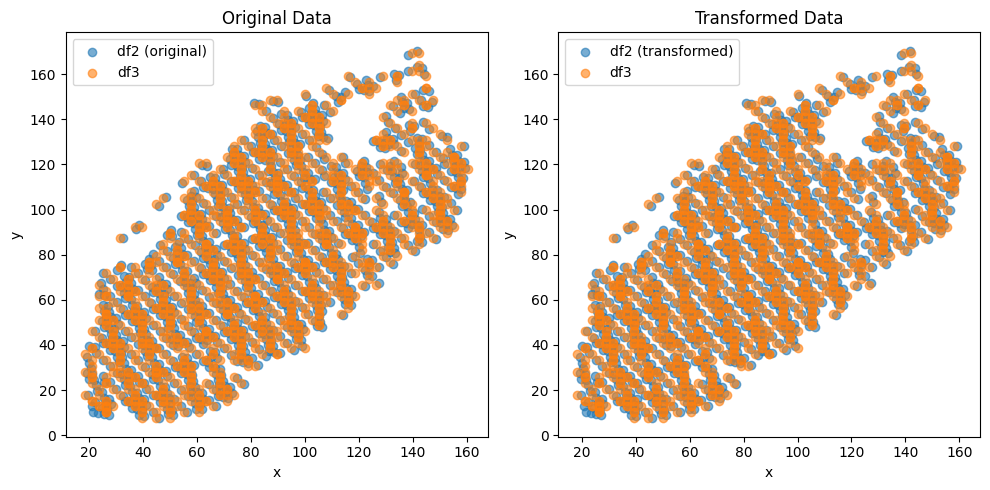

               0           1
0      31.139337    8.221962
1     132.648612  107.250247
2      58.354867    9.731787
3     131.844322  133.890765
4     143.392105   92.963051
...          ...         ...
2273   64.349985   54.194344
2274   86.362299   54.392563
2275   26.262673   59.781498
2276  101.505443   68.062102
2277   67.558815   17.427655

[2278 rows x 2 columns]


In [81]:
dist_min = 1  # min euclidean distance
data2_spatial_results = perform_transformations(data2_spatial_results, data3_spatial_results, Y_c, Z_c, data2_leiden_str, data1_leiden_str)
print(data2_spatial_results)

C:\Users\28123\AppData\Local\Temp\ipykernel_16000\1740125892.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Y_C_['spatial_ID'] = Y_C_.index
C:\Users\28123\AppData\Local\Temp\ipykernel_16000\1740125892.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Z_C_['matabolic_ID'] = Z_C_.index


min_row_indices (172,)
Optimal Translation and Rotation Parameters:
Translation: ( 3.050618932544344e-06 , -1.2956189074350728e-06 )
Rotation (radians): -0.0002835750493610888
Transform Matrix:
 [[ 9.99999960e-01  2.83575046e-04  3.05061893e-06]
 [-2.83575046e-04  9.99999960e-01 -1.29561891e-06]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00]]


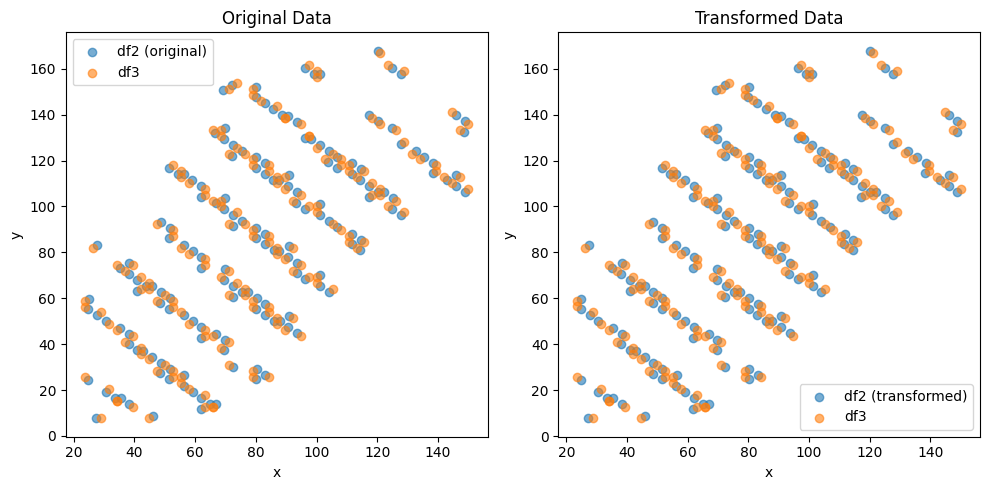

               0           1
0      37.074175    6.900640
1     125.510420  117.759852
2      63.892000   11.775980
3     121.406514  144.094659
4     137.943779  104.916248
...          ...         ...
2273   64.323406   56.638819
2274   86.140987   59.567023
2275   25.837161   57.456521
2276   99.470831   75.010028
2277   72.069826   20.554489

[2278 rows x 2 columns]


In [83]:
dist_min = 1.5  # min euclidean distance
data2_spatial_results = perform_transformations(data2_spatial_results, data3_spatial_results, Y_c, Z_c, data2_leiden_str, data1_leiden_str)
print(data2_spatial_results)

C:\Users\28123\AppData\Local\Temp\ipykernel_16000\1740125892.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Y_C_['spatial_ID'] = Y_C_.index
C:\Users\28123\AppData\Local\Temp\ipykernel_16000\1740125892.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Z_C_['matabolic_ID'] = Z_C_.index


min_row_indices (0,)
Optimal Translation and Rotation Parameters:
Translation: ( 0.0 , 0.0 )
Rotation (radians): 0.0
Transform Matrix:
 [[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


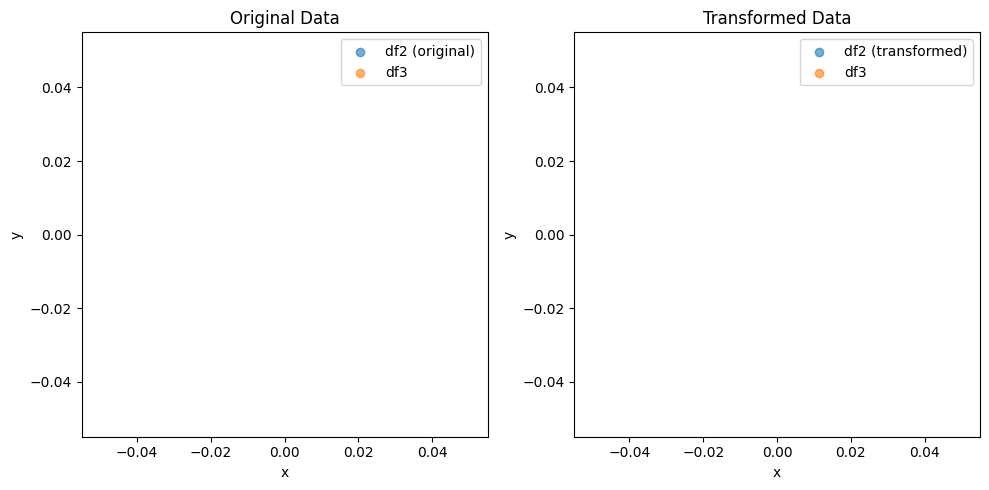

               0           1
0      37.074175    6.900640
1     125.510420  117.759852
2      63.892000   11.775980
3     121.406514  144.094659
4     137.943779  104.916248
...          ...         ...
2273   64.323406   56.638819
2274   86.140987   59.567023
2275   25.837161   57.456521
2276   99.470831   75.010028
2277   72.069826   20.554489

[2278 rows x 2 columns]


In [84]:
dist_min = 2  # min euclidean distance
data2_spatial_results = perform_transformations(data2_spatial_results, data3_spatial_results, Y_c, Z_c, data2_leiden_str, data1_leiden_str)
print(data2_spatial_results)

C:\Users\28123\AppData\Local\Temp\ipykernel_18876\1740125892.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Y_C_['spatial_ID'] = Y_C_.index
C:\Users\28123\AppData\Local\Temp\ipykernel_18876\1740125892.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Z_C_['matabolic_ID'] = Z_C_.index


min_row_indices (173,)
Optimal Translation and Rotation Parameters:
Translation: ( -2.7223861896241415 , -3.3850942186292783 )
Rotation (radians): 0.0022058722807998645
Transform Matrix:
 [[ 9.99997567e-01 -2.20587049e-03 -2.72238619e+00]
 [ 2.20587049e-03  9.99997567e-01 -3.38509422e+00]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00]]


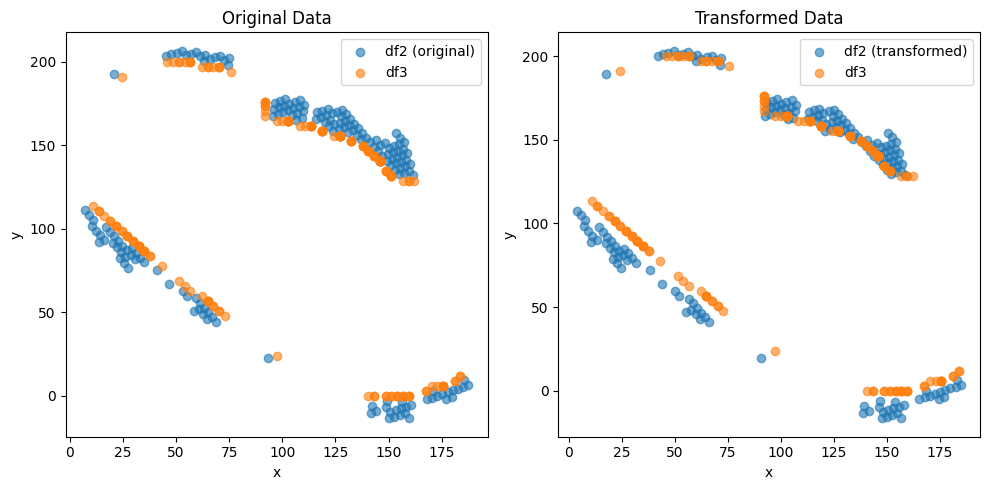

C:\Users\28123\AppData\Local\Temp\ipykernel_18876\1740125892.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Y_C_['spatial_ID'] = Y_C_.index
C:\Users\28123\AppData\Local\Temp\ipykernel_18876\1740125892.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Z_C_['matabolic_ID'] = Z_C_.index


min_row_indices (193,)
Optimal Translation and Rotation Parameters:
Translation: ( 1.9450016995500887 , 5.0745491136901215 )
Rotation (radians): -0.010863047349550315
Transform Matrix:
 [[ 0.999941    0.01086283  1.9450017 ]
 [-0.01086283  0.999941    5.07454911]
 [ 0.          0.          1.        ]]


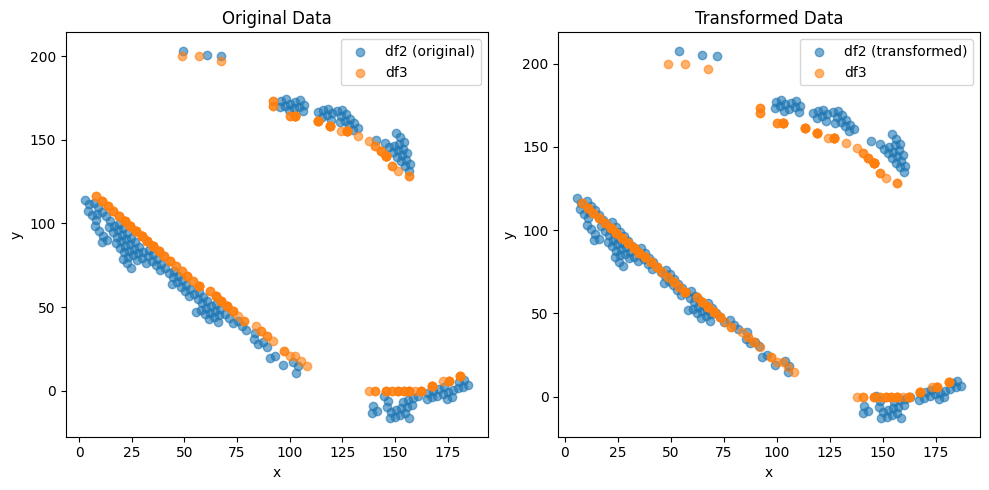

C:\Users\28123\AppData\Local\Temp\ipykernel_18876\1740125892.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Y_C_['spatial_ID'] = Y_C_.index
C:\Users\28123\AppData\Local\Temp\ipykernel_18876\1740125892.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Z_C_['matabolic_ID'] = Z_C_.index


min_row_indices (176,)
Optimal Translation and Rotation Parameters:
Translation: ( -3.275476948868201 , -4.264759782495093 )
Rotation (radians): -0.00029869058328140825
Transform Matrix:
 [[ 9.99999955e-01  2.98690579e-04 -3.27547695e+00]
 [-2.98690579e-04  9.99999955e-01 -4.26475978e+00]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00]]


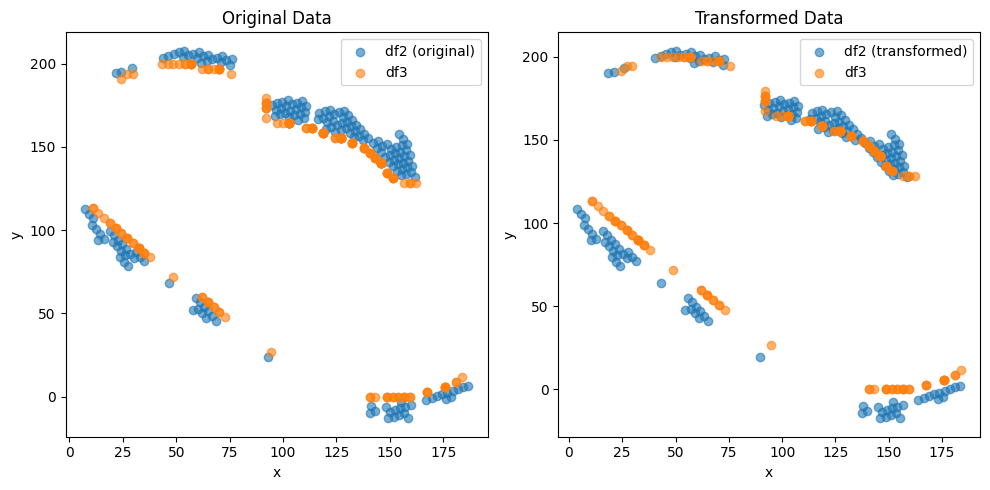

C:\Users\28123\AppData\Local\Temp\ipykernel_18876\1740125892.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Y_C_['spatial_ID'] = Y_C_.index
C:\Users\28123\AppData\Local\Temp\ipykernel_18876\1740125892.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Z_C_['matabolic_ID'] = Z_C_.index


min_row_indices (198,)
Optimal Translation and Rotation Parameters:
Translation: ( 2.0931646146214447 , 5.149261265964467 )
Rotation (radians): -0.008025087913974051
Transform Matrix:
 [[ 0.9999678   0.008025    2.09316461]
 [-0.008025    0.9999678   5.14926127]
 [ 0.          0.          1.        ]]


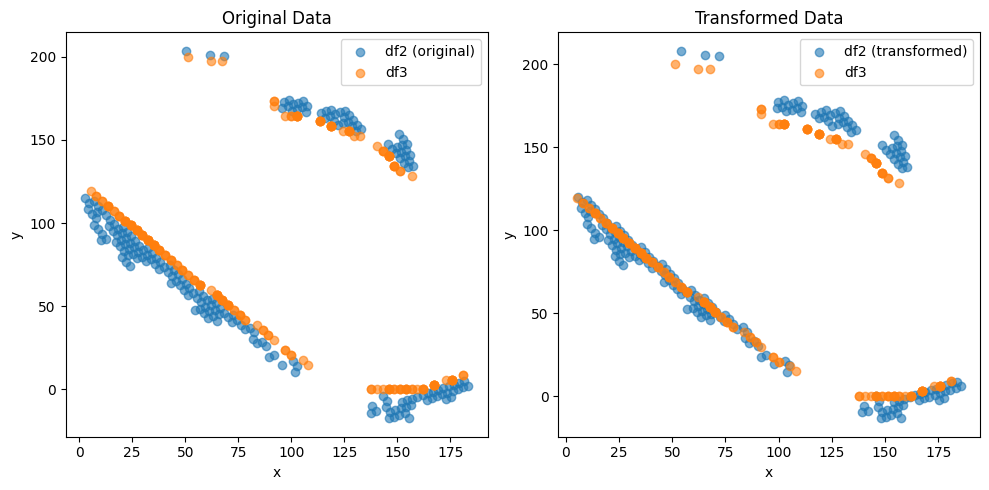

C:\Users\28123\AppData\Local\Temp\ipykernel_18876\1740125892.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Y_C_['spatial_ID'] = Y_C_.index
C:\Users\28123\AppData\Local\Temp\ipykernel_18876\1740125892.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Z_C_['matabolic_ID'] = Z_C_.index


min_row_indices (184,)
Optimal Translation and Rotation Parameters:
Translation: ( -0.5405963738245151 , -6.151867279290688 )
Rotation (radians): 0.017937275712146497
Transform Matrix:
 [[ 0.99983913 -0.01793631 -0.54059637]
 [ 0.01793631  0.99983913 -6.15186728]
 [ 0.          0.          1.        ]]


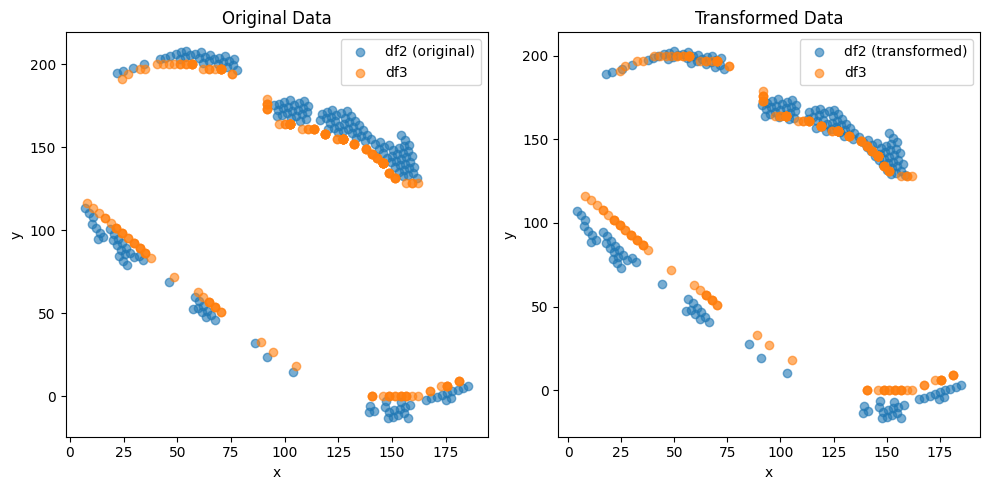

C:\Users\28123\AppData\Local\Temp\ipykernel_18876\1740125892.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Y_C_['spatial_ID'] = Y_C_.index
C:\Users\28123\AppData\Local\Temp\ipykernel_18876\1740125892.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Z_C_['matabolic_ID'] = Z_C_.index


min_row_indices (194,)
Optimal Translation and Rotation Parameters:
Translation: ( 1.8187084444131207 , 5.193382333779782 )
Rotation (radians): -0.010009360395085994
Transform Matrix:
 [[ 0.99994991  0.01000919  1.81870844]
 [-0.01000919  0.99994991  5.19338233]
 [ 0.          0.          1.        ]]


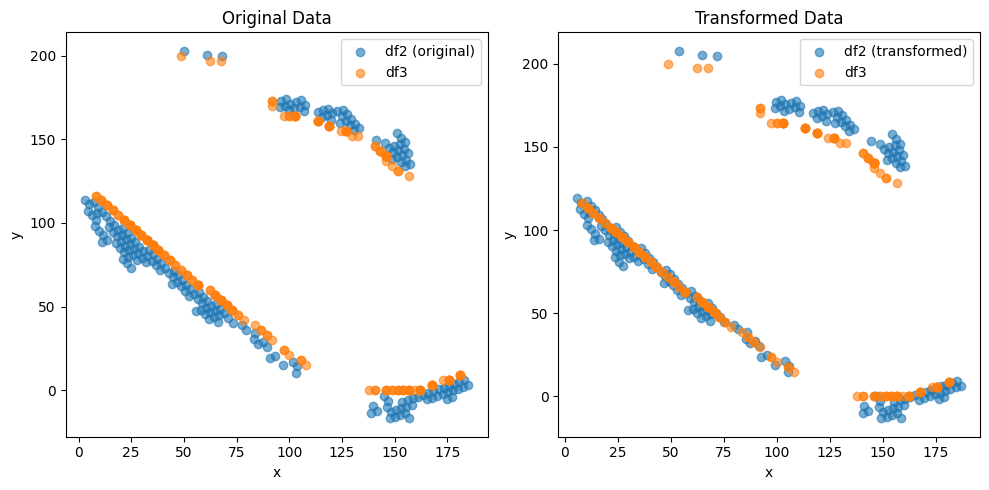

C:\Users\28123\AppData\Local\Temp\ipykernel_18876\1740125892.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Y_C_['spatial_ID'] = Y_C_.index
C:\Users\28123\AppData\Local\Temp\ipykernel_18876\1740125892.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Z_C_['matabolic_ID'] = Z_C_.index


min_row_indices (174,)
Optimal Translation and Rotation Parameters:
Translation: ( -3.286174993461381 , -4.233289779580462 )
Rotation (radians): 9.0432570807931e-05
Transform Matrix:
 [[ 9.99999996e-01 -9.04325707e-05 -3.28617499e+00]
 [ 9.04325707e-05  9.99999996e-01 -4.23328978e+00]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00]]


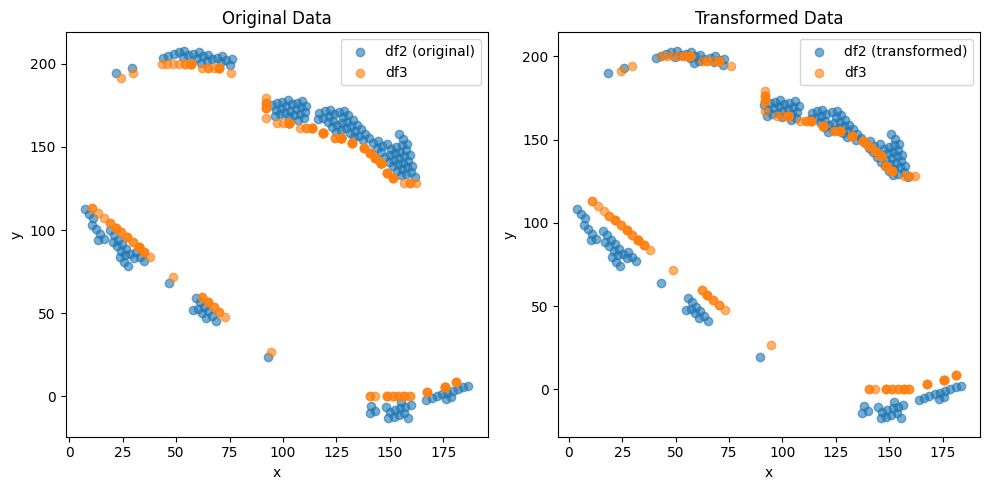

C:\Users\28123\AppData\Local\Temp\ipykernel_18876\1740125892.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Y_C_['spatial_ID'] = Y_C_.index
C:\Users\28123\AppData\Local\Temp\ipykernel_18876\1740125892.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Z_C_['matabolic_ID'] = Z_C_.index


min_row_indices (198,)
Optimal Translation and Rotation Parameters:
Translation: ( 2.1195049449682832 , 5.238556362084423 )
Rotation (radians): -0.008188207711426566
Transform Matrix:
 [[ 0.99996648  0.00818812  2.11950494]
 [-0.00818812  0.99996648  5.23855636]
 [ 0.          0.          1.        ]]


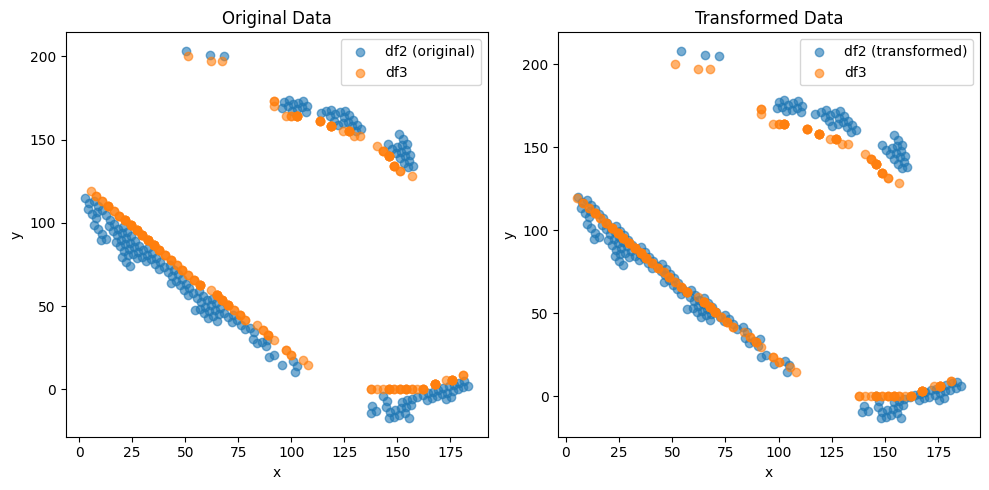

C:\Users\28123\AppData\Local\Temp\ipykernel_18876\1740125892.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Y_C_['spatial_ID'] = Y_C_.index
C:\Users\28123\AppData\Local\Temp\ipykernel_18876\1740125892.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Z_C_['matabolic_ID'] = Z_C_.index


min_row_indices (183,)
Optimal Translation and Rotation Parameters:
Translation: ( -0.6434185295562633 , -6.1837626140864925 )
Rotation (radians): 0.017945512179668378
Transform Matrix:
 [[ 0.99983898 -0.01794455 -0.64341853]
 [ 0.01794455  0.99983898 -6.18376261]
 [ 0.          0.          1.        ]]


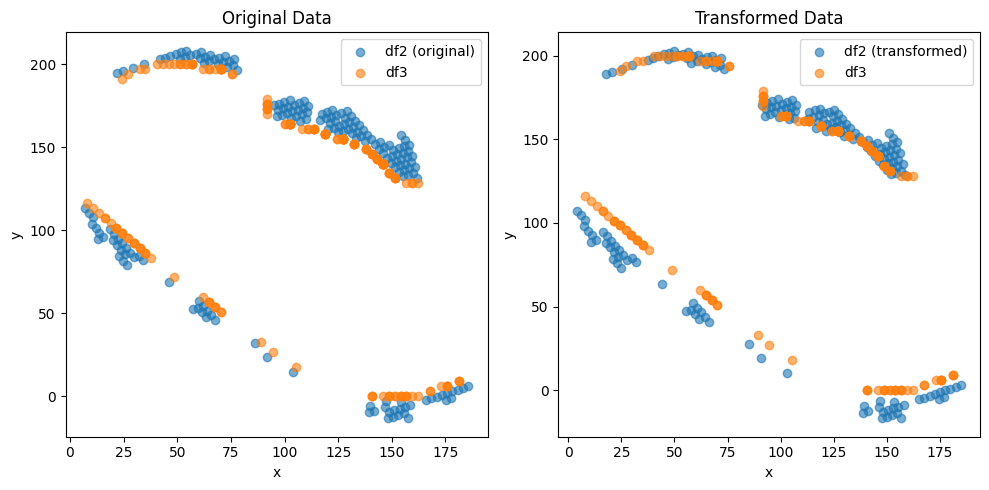

C:\Users\28123\AppData\Local\Temp\ipykernel_18876\1740125892.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Y_C_['spatial_ID'] = Y_C_.index
C:\Users\28123\AppData\Local\Temp\ipykernel_18876\1740125892.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Z_C_['matabolic_ID'] = Z_C_.index


min_row_indices (192,)
Optimal Translation and Rotation Parameters:
Translation: ( 2.0306064141012246 , 5.241238186860129 )
Rotation (radians): -0.009489370686971305
Transform Matrix:
 [[ 0.99995498  0.00948923  2.03060641]
 [-0.00948923  0.99995498  5.24123819]
 [ 0.          0.          1.        ]]


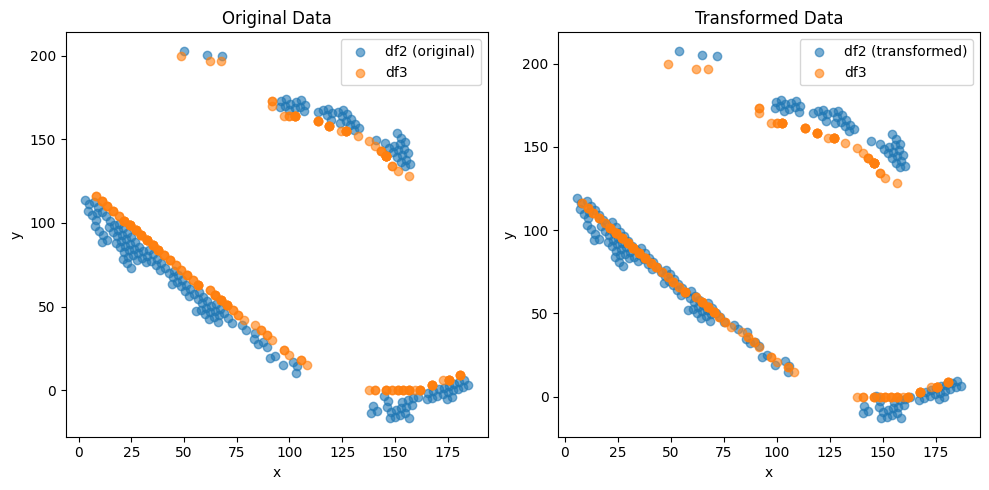

C:\Users\28123\AppData\Local\Temp\ipykernel_18876\1740125892.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Y_C_['spatial_ID'] = Y_C_.index
C:\Users\28123\AppData\Local\Temp\ipykernel_18876\1740125892.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Z_C_['matabolic_ID'] = Z_C_.index


min_row_indices (177,)
Optimal Translation and Rotation Parameters:
Translation: ( -1.414412009187399 , -5.940211040130305 )
Rotation (radians): 0.01395858817631294
Transform Matrix:
 [[ 0.99990258 -0.01395813 -1.41441201]
 [ 0.01395813  0.99990258 -5.94021104]
 [ 0.          0.          1.        ]]


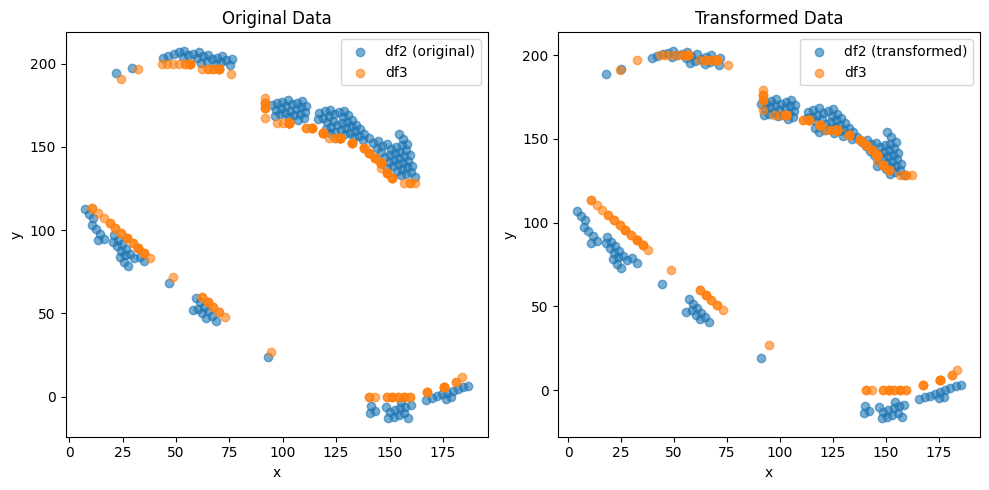

C:\Users\28123\AppData\Local\Temp\ipykernel_18876\1740125892.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Y_C_['spatial_ID'] = Y_C_.index
C:\Users\28123\AppData\Local\Temp\ipykernel_18876\1740125892.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Z_C_['matabolic_ID'] = Z_C_.index


min_row_indices (195,)
Optimal Translation and Rotation Parameters:
Translation: ( 2.1288053855520572 , 5.363429220879969 )
Rotation (radians): -0.009888733190048259
Transform Matrix:
 [[ 0.99995111  0.00988857  2.12880539]
 [-0.00988857  0.99995111  5.36342922]
 [ 0.          0.          1.        ]]


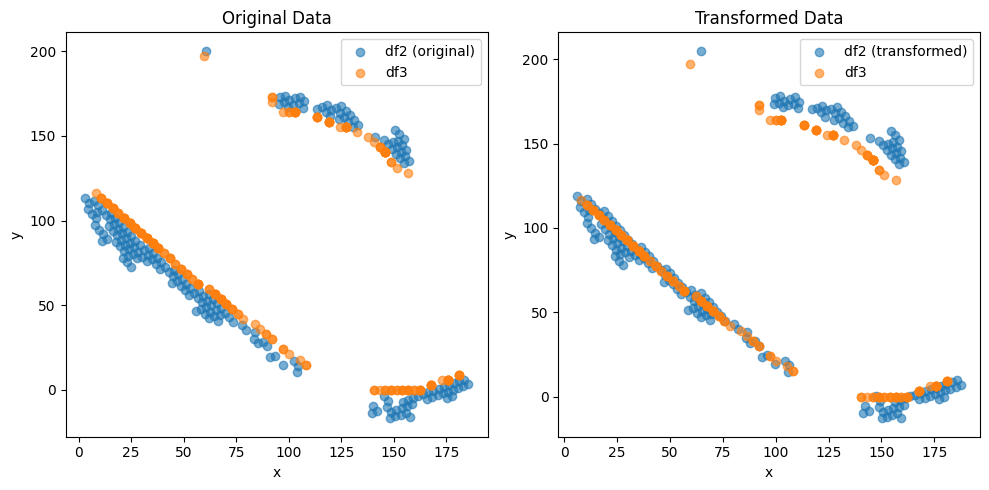

C:\Users\28123\AppData\Local\Temp\ipykernel_18876\1740125892.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Y_C_['spatial_ID'] = Y_C_.index
C:\Users\28123\AppData\Local\Temp\ipykernel_18876\1740125892.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Z_C_['matabolic_ID'] = Z_C_.index


min_row_indices (176,)
Optimal Translation and Rotation Parameters:
Translation: ( -1.7596732632221235 , -5.4939634517936184 )
Rotation (radians): 0.010494900461595359
Transform Matrix:
 [[ 0.99994493 -0.01049471 -1.75967326]
 [ 0.01049471  0.99994493 -5.49396345]
 [ 0.          0.          1.        ]]


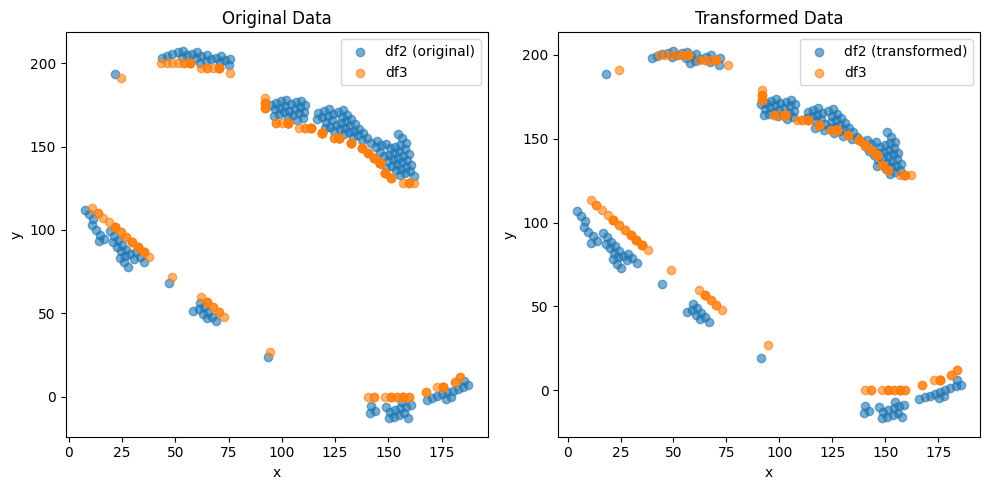

C:\Users\28123\AppData\Local\Temp\ipykernel_18876\1740125892.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Y_C_['spatial_ID'] = Y_C_.index
C:\Users\28123\AppData\Local\Temp\ipykernel_18876\1740125892.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Z_C_['matabolic_ID'] = Z_C_.index


min_row_indices (192,)
Optimal Translation and Rotation Parameters:
Translation: ( 1.9279867511279922 , 5.396859410602423 )
Rotation (radians): -0.009845225453744633
Transform Matrix:
 [[ 0.99995154  0.00984507  1.92798675]
 [-0.00984507  0.99995154  5.39685941]
 [ 0.          0.          1.        ]]


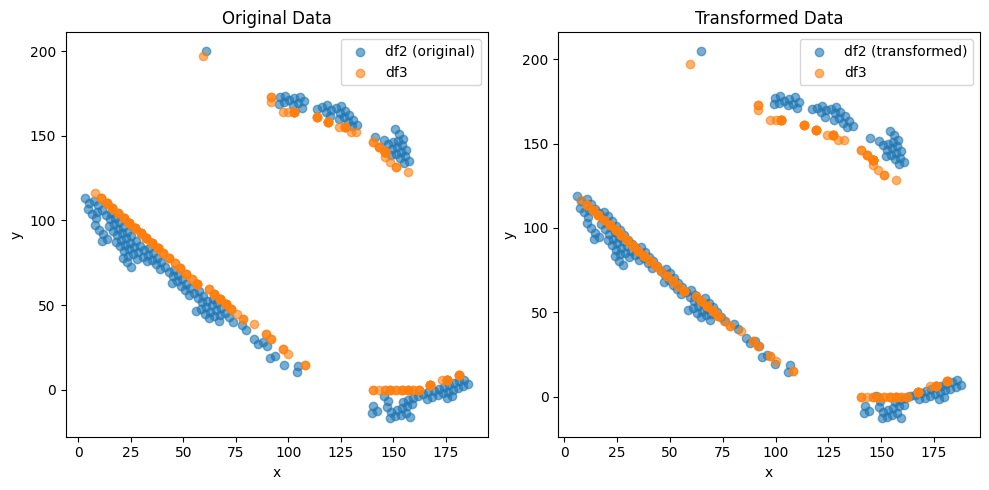

C:\Users\28123\AppData\Local\Temp\ipykernel_18876\1740125892.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Y_C_['spatial_ID'] = Y_C_.index
C:\Users\28123\AppData\Local\Temp\ipykernel_18876\1740125892.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Z_C_['matabolic_ID'] = Z_C_.index


min_row_indices (176,)
Optimal Translation and Rotation Parameters:
Translation: ( -1.7234248598357205 , -5.5090994087090905 )
Rotation (radians): 0.010660849088517806
Transform Matrix:
 [[ 0.99994317 -0.01066065 -1.72342486]
 [ 0.01066065  0.99994317 -5.50909941]
 [ 0.          0.          1.        ]]


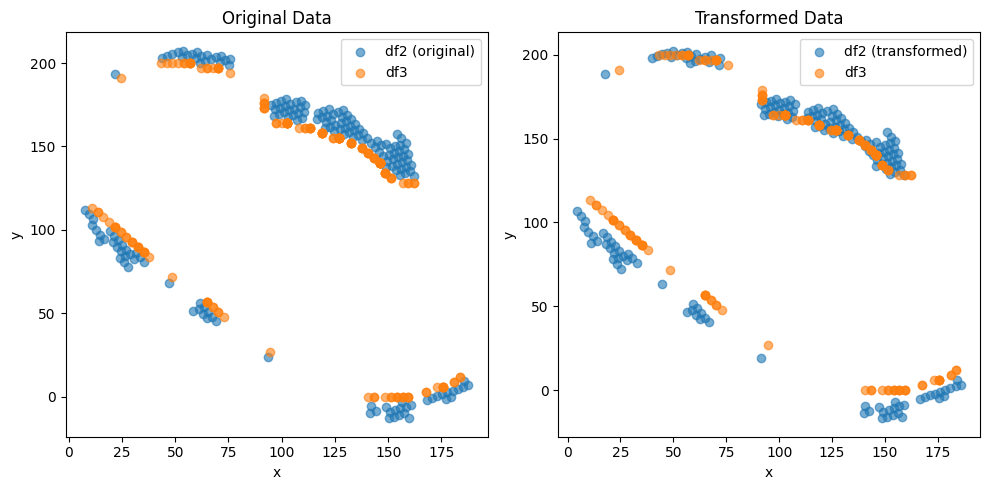

C:\Users\28123\AppData\Local\Temp\ipykernel_18876\1740125892.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Y_C_['spatial_ID'] = Y_C_.index
C:\Users\28123\AppData\Local\Temp\ipykernel_18876\1740125892.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Z_C_['matabolic_ID'] = Z_C_.index


min_row_indices (192,)
Optimal Translation and Rotation Parameters:
Translation: ( 1.9421384101491914 , 5.3648188471112395 )
Rotation (radians): -0.009901069553019854
Transform Matrix:
 [[ 0.99995098  0.00990091  1.94213841]
 [-0.00990091  0.99995098  5.36481885]
 [ 0.          0.          1.        ]]


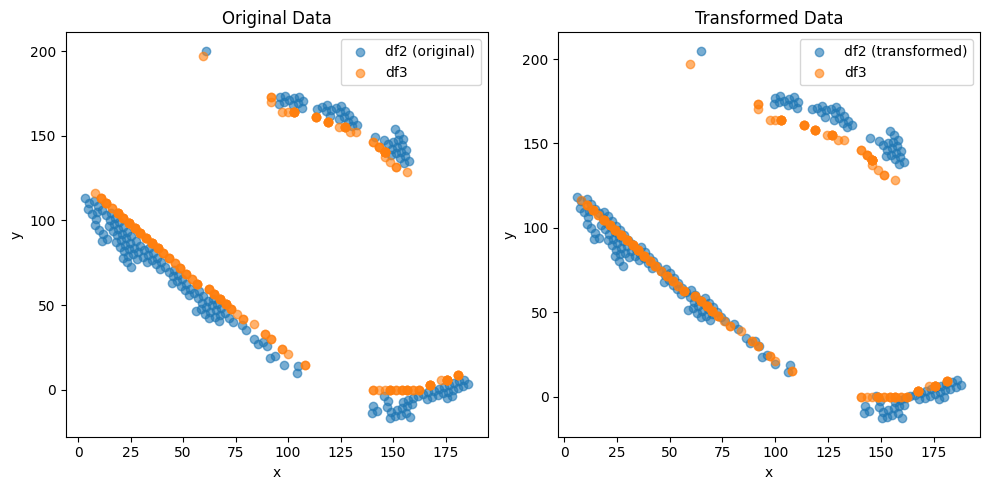

C:\Users\28123\AppData\Local\Temp\ipykernel_18876\1740125892.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Y_C_['spatial_ID'] = Y_C_.index
C:\Users\28123\AppData\Local\Temp\ipykernel_18876\1740125892.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Z_C_['matabolic_ID'] = Z_C_.index


min_row_indices (177,)
Optimal Translation and Rotation Parameters:
Translation: ( -1.8050984515699622 , -5.414323239372565 )
Rotation (radians): 0.01017281870856639
Transform Matrix:
 [[ 0.99994826 -0.01017264 -1.80509845]
 [ 0.01017264  0.99994826 -5.41432324]
 [ 0.          0.          1.        ]]


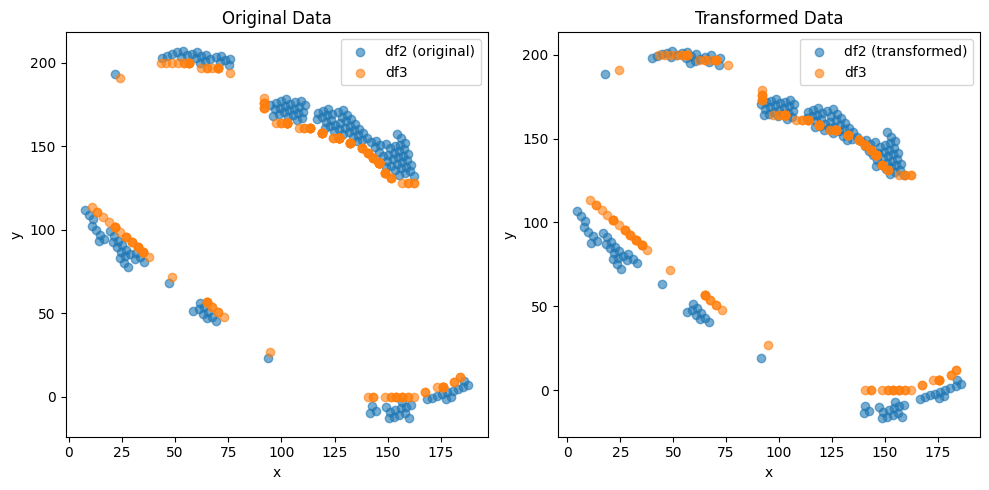

C:\Users\28123\AppData\Local\Temp\ipykernel_18876\1740125892.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Y_C_['spatial_ID'] = Y_C_.index
C:\Users\28123\AppData\Local\Temp\ipykernel_18876\1740125892.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Z_C_['matabolic_ID'] = Z_C_.index


min_row_indices (191,)
Optimal Translation and Rotation Parameters:
Translation: ( 1.8844497541687988 , 5.386757488257567 )
Rotation (radians): -0.01021284478800798
Transform Matrix:
 [[ 0.99994785  0.01021267  1.88444975]
 [-0.01021267  0.99994785  5.38675749]
 [ 0.          0.          1.        ]]


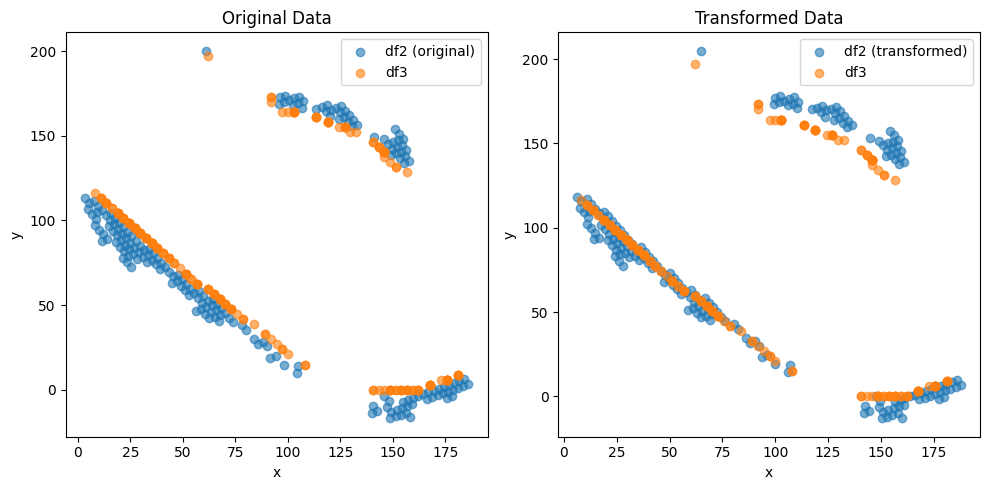

C:\Users\28123\AppData\Local\Temp\ipykernel_18876\1740125892.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Y_C_['spatial_ID'] = Y_C_.index
C:\Users\28123\AppData\Local\Temp\ipykernel_18876\1740125892.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Z_C_['matabolic_ID'] = Z_C_.index


min_row_indices (177,)
Optimal Translation and Rotation Parameters:
Translation: ( -1.7372672306415464 , -5.473166089146351 )
Rotation (radians): 0.010710079673529178
Transform Matrix:
 [[ 0.99994265 -0.01070987 -1.73726723]
 [ 0.01070987  0.99994265 -5.47316609]
 [ 0.          0.          1.        ]]


KeyboardInterrupt: 

In [262]:
dist_min = 3  # min euclidean distance
data2_spatial_results = perform_transformations(data2_spatial_results, data3_spatial_results, Y_c, Z_c, data2_leiden_str, data1_leiden_str)
print(data2_spatial_results)

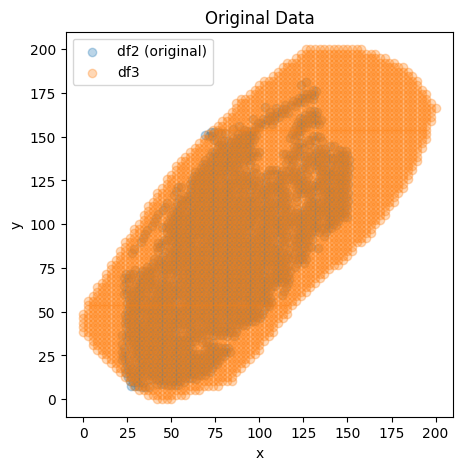

In [85]:
plt.figure(figsize=(5, 5))

plt.scatter(data2_spatial_results[0], data2_spatial_results[1], label='df2 (original)', alpha=0.3)
plt.scatter(data3_spatial_results[0], data3_spatial_results[1], label='df3', alpha=0.3)
plt.title('Original Data')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()



In [86]:
Y_c = data2_spatial_results
print(Z_c.shape, Y_c.shape)
from scipy.spatial.distance import cdist
distances = cdist(data3_spatial_results, data2_spatial_results, metric='euclidean')
dist_df = pd.DataFrame(distances)
print(dist_df.shape)
min_row_indices = dist_df.idxmin()
print(Z_c.shape, Y_c.shape)
###############找出Y_C(spatial)周围dist_min以内的Z_C(metabolic)点
Y_C_ = Y_c.iloc[:,:]
Y_C_['spatial_ID'] = Y_C_.index
Y_C_ = Y_C_.reset_index()
Y_C_["spatial_cluster"] = data2_leiden_str.astype(int)
Y_C_["spatial.CCA.Z"] = -1
Y_C_ = Y_C_.drop(columns=['index'])
Y_C_ = Y_C_.rename(columns={0: "spatial.CCA.X", 1:"spatial.CCA.Y"})
print(Z_c.shape, Y_c.shape)
Z_C_=Z_c.iloc[min_row_indices,]
Z_C_['matabolic_ID'] = Z_C_.index
Z_C_=Z_C_.reset_index()
Z_C_["matabolic_cluster"] = data1_leiden_str[min_row_indices].astype(int)
Z_C_=Z_C_.drop(columns=['index'])
Z_C_["matabolic.CCA.Z"] = 1
Z_C_=Z_C_.rename(columns={0: "metabolic.CCA.X", 1:"metabolic.CCA.Y"})
pairs = pd.concat([Y_C_,Z_C_],axis=1)
#pairs["distance"] = dist_df.iloc[row_indices,col_indices].values.diagonal()  //diagonal要求内存过大
print(pairs.head())


(3278, 2) (2278, 2)
(3278, 2278)
(3278, 2) (2278, 2)
(3278, 2) (2278, 2)
   spatial.CCA.X  spatial.CCA.Y  spatial_ID  spatial_cluster  spatial.CCA.Z  \
0      37.074175       6.900640           0                3             -1   
1     125.510420     117.759852           1                0             -1   
2      63.892000      11.775980           2                3             -1   
3     121.406514     144.094659           3                1             -1   
4     137.943779     104.916248           4                7             -1   

   metabolic.CCA.X  metabolic.CCA.Y  matabolic_ID  matabolic_cluster  \
0        36.842105         7.692308          2905                  2   
1       126.315789       117.948718          1023                  2   
2        63.157895        12.820513          2398                  1   
3       121.052632       143.589744          1145                  2   
4       136.842105       105.128205           804                  2   

   matabolic.CCA.Z 

C:\Users\28123\AppData\Local\Temp\ipykernel_16000\3338180352.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Z_C_['matabolic_ID'] = Z_C_.index


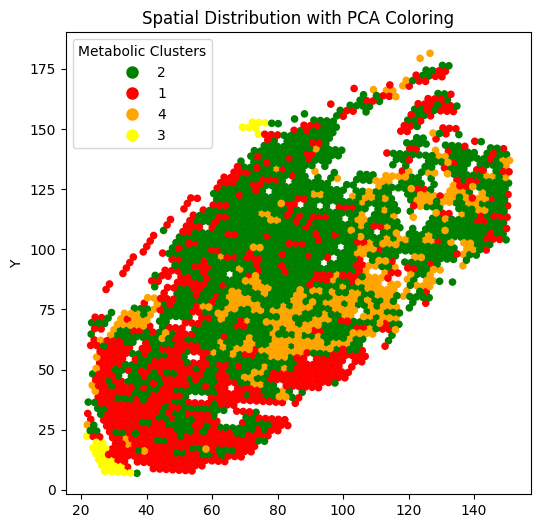

In [87]:
plt.figure(figsize=(6, 6))
plt.scatter(data2_spatial_results.iloc[:, 0],data2_spatial_results.iloc[:, 1], 
            c=[color_mapping[category] for category in pairs["matabolic_cluster"].tolist()], s=20, alpha=1)
plt.ylabel('Y')
plt.title('Spatial Distribution with PCA Coloring')
unique_categories = pairs["matabolic_cluster"].unique()
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color_mapping[cat], markersize=10) for cat in unique_categories]
plt.legend(handles, unique_categories, title="Metabolic Clusters")
plt.savefig("I:\\mutiomics\\Spatial Multimodal Analysis of Transcriptomes and Metabolomes in Tissues\\m1\\no_anchor_merge_nearst_pair.pdf")
plt.show()


In [88]:
dist_min = 2 ## min euclidean distance
from scipy.spatial.distance import cdist
distances = cdist(data3_spatial_results, data2_spatial_results, metric='euclidean')
dist_df = pd.DataFrame(distances)
###############找出Y_C(spatial)周围dist_min以内的Z_C(metabolic)点
row_indices, col_indices = np.where(distances <dist_min)
unique_row_indices = np.unique(row_indices)
unique_col_indices = np.unique(col_indices)
#############plot
####Z_C is metablic and is at 1
Y_C_=Y_c.iloc[col_indices,]
Y_C_['spatial_ID'] = Y_C_.index
Y_C_=Y_C_.reset_index()
Y_C_["spatial_cluster"] = data2_leiden_str[col_indices].astype(int)
Y_C_["spatial.CCA.Z"] = -1
Y_C_=Y_C_.drop(columns=['index'])
Y_C_=Y_C_.rename(columns={0: "spatial.CCA.X", 1:"spatial.CCA.Y"})

Z_C_=Z_c.iloc[row_indices,]
Z_C_['matabolic_ID'] = Z_C_.index
Z_C_=Z_C_.reset_index()
Z_C_["matabolic_cluster"] = data1_leiden_str[row_indices].astype(int)
Z_C_=Z_C_.drop(columns=['index'])
Z_C_["matabolic.CCA.Z"] = 1
Z_C_=Z_C_.rename(columns={0: "metabolic.CCA.X", 1:"metabolic.CCA.Y"})

pairs = pd.concat([Y_C_,Z_C_],axis=1)
pairs["distance"] = dist_df.iloc[row_indices,col_indices].values.diagonal()  
print(pairs.head())


def calculate_simpson_index(values):
    total_count = len(values)
    unique_values = set(values)
    simpson_index = 1 - sum((values.count(value) / total_count) ** 2 for value in unique_values)
    return simpson_index

def main(df):
    # 保存每个 X1 中值对应的 X2 中值的列表
    x1_x2_lists = df.groupby('spatial_ID')['matabolic_cluster'].apply(list).reset_index()

    # 计算每个 X1 中值的辛普森指数
    simpson_indices = x1_x2_lists['matabolic_cluster'].apply(calculate_simpson_index)

    # 保存每个 X1 中值对应的 X2 中出现频率最高的值
    max_x2_values = x1_x2_lists['matabolic_cluster'].apply(lambda x: max(set(x), key=x.count))

    # 生成新的 DataFrame
    new_df = pd.DataFrame({'spatial_ID': x1_x2_lists['spatial_ID'], 'Most_freq_metabolic_cluster': max_x2_values, 'Simpson_Index': simpson_indices})

    # 合并 X3 列
    new_df = pd.merge(new_df, df[['spatial_ID',"spatial_cluster"]].drop_duplicates(), on='spatial_ID', how='left')

    return new_df

# 示例输入数据
data = pairs
df = pd.DataFrame(data)

# 调用主函数
result_df = main(df)
result_df

   spatial.CCA.X  spatial.CCA.Y  spatial_ID  spatial_cluster  spatial.CCA.Z  \
0     149.760581     103.940844        1733                3             -1   
1     148.850800     106.378155         336                3             -1   
2     149.760581     103.940844        1733                3             -1   
3     148.850800     106.378155         336                3             -1   
4     149.912208     108.653538        2167                3             -1   

   metabolic.CCA.X  metabolic.CCA.Y  matabolic_ID  matabolic_cluster  \
0            150.0       102.564103           556                  1   
1            150.0       105.128205           557                  2   
2            150.0       105.128205           557                  2   
3            150.0       107.692308           558                  1   
4            150.0       107.692308           558                  1   

   matabolic.CCA.Z  distance  
0                1  1.397404  
1                1  1.697950  

C:\Users\28123\AppData\Local\Temp\ipykernel_16000\237650377.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Y_C_['spatial_ID'] = Y_C_.index
C:\Users\28123\AppData\Local\Temp\ipykernel_16000\237650377.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Z_C_['matabolic_ID'] = Z_C_.index


spatial_ID  Most_freq_metabolic_cluster  Simpson_Index  spatial_cluster
0              0                            2            0.5                3
1              1                            2            0.5                0
2              2                            1            0.0                3
3              3                            2            0.0                1
4              4                            2            0.0                7
...          ...                          ...            ...              ...
2273        2273                            2            0.5                0
2274        2274                            4            0.0                2
2275        2275                            1            0.5                3
2276        2276                            2            0.5                4
2277        2277                            1            0.5                1

[2278 rows x 4 columns]

<bound method NDFrame.head of       spatial_ID  Most_freq_metabolic_cluster  Simpson_Index  spatial_cluster
0              0                            2            0.5                3
1              1                            2            0.5                0
2              2                            1            0.0                3
3              3                            2            0.0                1
4              4                            2            0.0                7
...          ...                          ...            ...              ...
2273        2273                            2            0.5                0
2274        2274                            4            0.0                2
2275        2275                            1            0.5                3
2276        2276                            2            0.5                4
2277        2277                            1            0.5                1

[2278 rows x 4 columns]>
      sp

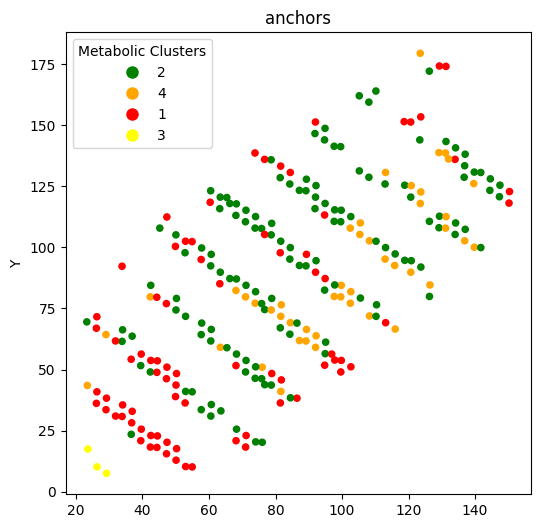

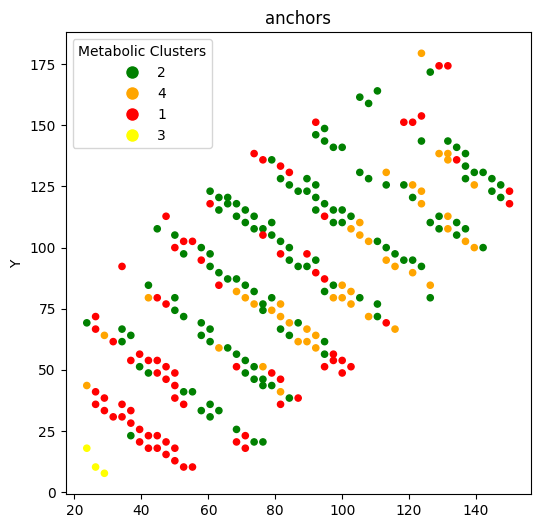

In [89]:
###### find transcript-metaboic pairs anchors by filtering: 
######1/simpson index less than 0.2 2/Most_freq_metabolic_cluster==matabolic_cluster
print(result_df.head)
#print(pairs.head)
merged_df = pd.merge(result_df, pairs, on='spatial_ID', how='inner')
merged_df = pd.DataFrame(merged_df)
print(merged_df)
merged_df = merged_df[(merged_df['Simpson_Index'] < 0.001) & (merged_df['Most_freq_metabolic_cluster'] == merged_df['matabolic_cluster'])&(merged_df['distance'] < 0.5) ]
merged_df = merged_df.drop_duplicates(subset="matabolic_ID")
print(merged_df["spatial_ID"])

plt.figure(figsize=(6, 6))
plt.scatter(data2_spatial_results.iloc[merged_df["spatial_ID"], 0],data2_spatial_results.iloc[merged_df["spatial_ID"], 1], 
            c=[color_mapping[category] for category in merged_df["matabolic_cluster"].tolist()], s=20, alpha=1)
plt.ylabel('Y')
plt.title('anchors')
unique_categories = merged_df["matabolic_cluster"].unique()
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color_mapping[cat], markersize=10) for cat in unique_categories]
plt.legend(handles, unique_categories, title="Metabolic Clusters")
plt.savefig("I:\\mutiomics\\Spatial Multimodal Analysis of Transcriptomes and Metabolomes in Tissues\\m1\\anchor_spatial.pdf")
plt.show()

plt.figure(figsize=(6, 6))
plt.scatter(data3_spatial_results.iloc[merged_df["matabolic_ID"], 0],data3_spatial_results.iloc[merged_df["matabolic_ID"], 1], 
            c=[color_mapping[category] for category in merged_df["matabolic_cluster"].tolist()], s=20, alpha=1)
plt.ylabel('Y')
plt.title('anchors')
unique_categories = merged_df["matabolic_cluster"].unique()
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color_mapping[cat], markersize=10) for cat in unique_categories]
plt.legend(handles, unique_categories, title="Metabolic Clusters")
plt.savefig("I:\\mutiomics\\Spatial Multimodal Analysis of Transcriptomes and Metabolomes in Tissues\\m1\\anchor_metabolic.pdf")
plt.show()


In [90]:
def convert_to_array(x):
    if isinstance(x, csr_matrix):
        return x.toarray()
    elif isinstance(x, np.ndarray):
        return x
    else:
        raise ValueError("Unsupported input type. Must be csr_matrix or ndarray.")
def tpm_normalize(counts_matrix):
    # 计算每个细胞的总表达量
    total_counts_per_cell = counts_matrix.sum(axis=1)
    # 计算每个基因的 TPM
    tpm_matrix = (counts_matrix.div(total_counts_per_cell, axis=0)) * 1e4
    return tpm_matrix
        
scaler = MinMaxScaler(feature_range=(-1, 1))
DF1 = convert_to_array(adata2.X)
DF1 = pd.DataFrame(DF1)
DF1 = tpm_normalize(DF1)
DF1 = np.log2(DF1 + 1)
DF1 = scaler.fit_transform(DF1)
DF1 = pd.DataFrame(DF1)

DF2 = convert_to_array(adata1.X)
DF2 = pd.DataFrame(DF2)
DF2 = scaler.fit_transform(DF2)
DF2 = pd.DataFrame(DF2)

print(DF1.shape,DF2.shape)
spatial_ID_list = merged_df['spatial_ID'].tolist()
metabolic_ID_list = merged_df['matabolic_ID'].tolist()

# 从 DF1 和 DF2 中提取对应的样本
spatial_samples = DF1.loc[spatial_ID_list,:]
index_strings = adata2.var.index.astype(str)
column_mapping = {old_name: new_name for old_name, new_name in zip(spatial_samples.columns, index_strings)}
spatial_samples.rename(columns=column_mapping, inplace=True)
rowindex = spatial_samples.shape[0]
spatial_samples.index = range(rowindex)

metabolic_samples = DF2.loc[metabolic_ID_list,:]
rowindex = metabolic_samples.shape[0]
index_strings = adata1.var.index.astype(str)
column_mapping = {old_name: new_name for old_name, new_name in zip(metabolic_samples.columns, index_strings)}
metabolic_samples.rename(columns=column_mapping, inplace=True)
metabolic_samples.index = range(rowindex)

print(spatial_samples.shape,metabolic_samples.shape,pd.concat([spatial_samples, metabolic_samples], axis=0).shape)
# 计算特征之间的相关性

(2278, 14319) (3278, 1538)
(261, 14319) (261, 1538) (522, 15857)


In [91]:
correlation_matrix = pd.concat([spatial_samples, metabolic_samples], axis=1)
correlation_matrix = correlation_matrix.corr()
# 显示相关性矩阵
print("DF1 列变量与 DF2 列变量之间的相关性矩阵：")

# 显示 DF3
#print(DF3)

DF1 列变量与 DF2 列变量之间的相关性矩阵：


(14319, 1538)


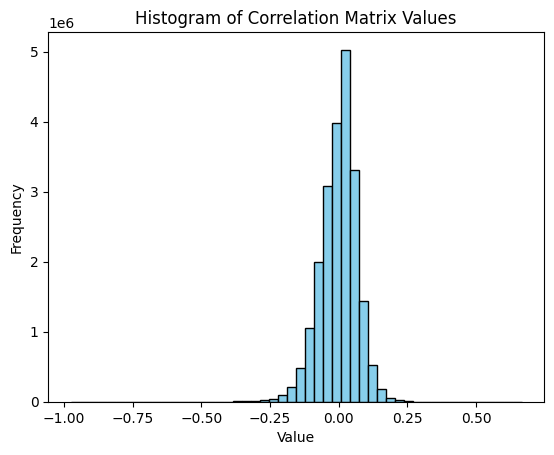

In [92]:
correlation_matrix2 = correlation_matrix.iloc[:14319, -1538:]
print(correlation_matrix2.shape)

values = correlation_matrix2.values.flatten()
plt.hist(values, bins=50, color='skyblue', edgecolor='black')
plt.title('Histogram of Correlation Matrix Values')
plt.xlabel('Value')
plt.ylabel('Frequency')

# 显示图形
plt.show()
high_correlation_spatial = []
high_correlation_metabolic = []



In [93]:
import pandas as pd
import numpy as np

# Example correlation matrix with NaN values

# Flatten the correlation matrix and keep track of the row and column indices, excluding NaNs
flattened = correlation_matrix2.values.flatten()
non_nan_indices = ~np.isnan(flattened)
flattened_non_nan = flattened[non_nan_indices]
original_indices = np.dstack(np.unravel_index(np.where(non_nan_indices)[0], correlation_matrix2.shape))[0]

# Sort the non-NaN flattened array to find the top 20 highest values
sorted_indices = np.argsort(flattened_non_nan)[::-1]
top_n = 30
top_indices = original_indices[sorted_indices[:top_n]]

# Retrieve the corresponding row and column indices
top_rows = top_indices[:, 0]
top_cols = top_indices[:, 1]

# Get the top 20 highest values
top_values = flattened_non_nan[sorted_indices[:top_n]]

# Convert to lists if needed
top_rows = list(top_rows)
top_cols = list(top_cols)
top_values = list(top_values)

# Display results
print("Top 20 highest correlation values (excluding NaNs):")
for i in range(len(top_values)):
    print(f"Value: {top_values[i]}, Row: {top_rows[i]}, Column: {top_cols[i]}")

# Optionally, convert to a DataFrame for easier viewing
top_correlations_df = pd.DataFrame({
    'Value': top_values,
    'Row': top_rows,
    'Column': top_cols
})

print("\nTop 20 highest correlation values in DataFrame format:")
print(top_correlations_df)


Top 20 highest correlation values (excluding NaNs):
Value: 0.6658659079618691, Row: 1015, Column: 613
Value: 0.6658659079618691, Row: 13645, Column: 613
Value: 0.625903456289885, Row: 4026, Column: 613
Value: 0.5796243507509112, Row: 13645, Column: 757
Value: 0.5796243507509111, Row: 1015, Column: 757
Value: 0.5526931527042157, Row: 8910, Column: 1284
Value: 0.5376386077480612, Row: 8278, Column: 962
Value: 0.5235684278908289, Row: 9623, Column: 613
Value: 0.5217985842706233, Row: 4177, Column: 613
Value: 0.5201277000949868, Row: 1470, Column: 440
Value: 0.5107298334130149, Row: 4026, Column: 757
Value: 0.510541401635562, Row: 5608, Column: 349
Value: 0.5085252279515979, Row: 5608, Column: 440
Value: 0.49800449579825884, Row: 1470, Column: 349
Value: 0.4978431203111452, Row: 10060, Column: 613
Value: 0.49370836030281534, Row: 8910, Column: 1077
Value: 0.4868940531332019, Row: 7192, Column: 1118
Value: 0.485847256390594, Row: 7192, Column: 1123
Value: 0.4856352239305069, Row: 12985, Col

(2, 261) (2, 261) (32, 261) (32, 261)
[5, 24, 25, 39, 40, 41, 50, 51, 63, 68, 75, 76, 79, 83, 88, 114, 119, 131, 144, 157, 166, 179, 181, 186, 188, 196, 216, 218, 220, 252, 260, 271, 285, 290, 294, 296, 305, 307, 329, 334, 338, 349, 359, 368, 374, 378, 422, 426, 434, 462, 482, 485, 487, 490, 504, 513, 529, 531, 537, 539, 547, 551, 560, 572, 579, 586, 589, 600, 604, 606, 609, 616, 621, 656, 661, 662, 668, 669, 670, 678, 684, 696, 727, 740, 759, 786, 791, 799, 811, 840, 853, 866, 869, 878, 880, 890, 905, 908, 922, 935, 941, 942, 947, 962, 972, 994, 996, 1009, 1011, 1012, 1021, 1027, 1029, 1051, 1068, 1077, 1084, 1087, 1088, 1092, 1096, 1110, 1113, 1119, 1130, 1143, 1149, 1152, 1153, 1156, 1162, 1183, 1188, 1197, 1198, 1203, 1230, 1236, 1256, 1263, 1267, 1283, 1297, 1300, 1301, 1303, 1308, 1311, 1316, 1333, 1341, 1353, 1360, 1362, 1394, 1397, 1399, 1405, 1433, 1434, 1441, 1454, 1460, 1464, 1473, 1478, 1495, 1502, 1503, 1525, 1528, 1534, 1544, 1548, 1549, 1550, 1552, 1553, 1567, 1575, 1578

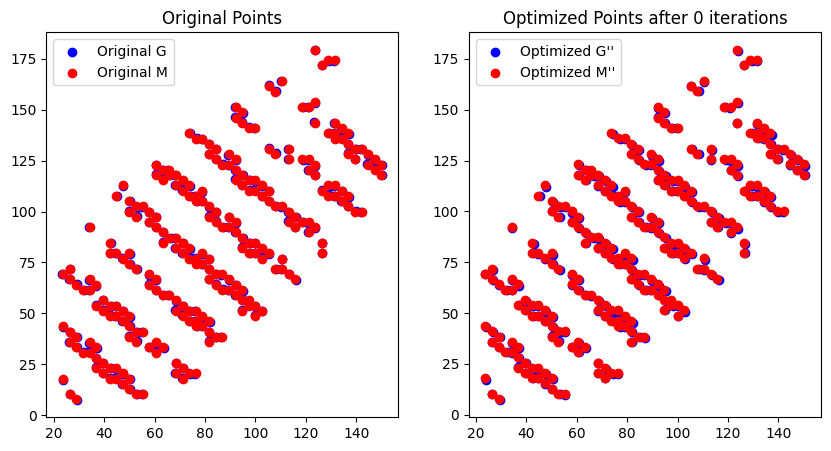

Iteration 0: Euclidean distance between G and M: 9.778106162745322


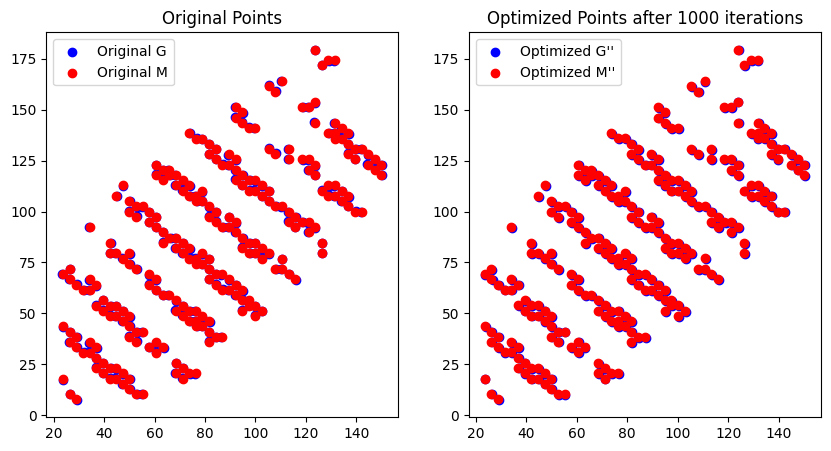

Iteration 1000: Euclidean distance between G and M: 8.058124059903323


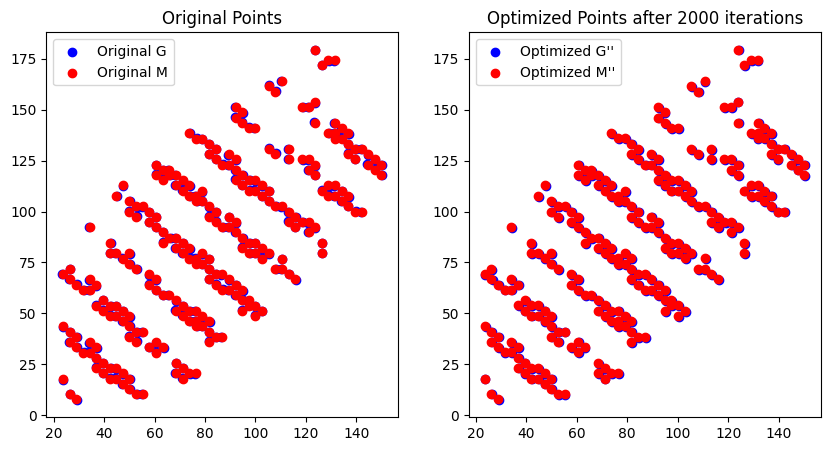

Iteration 2000: Euclidean distance between G and M: 8.058124059903323


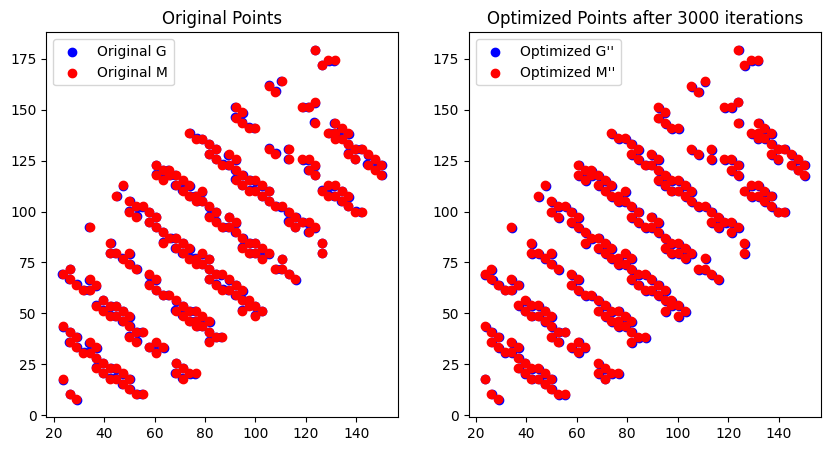

Iteration 3000: Euclidean distance between G and M: 8.058124059903323


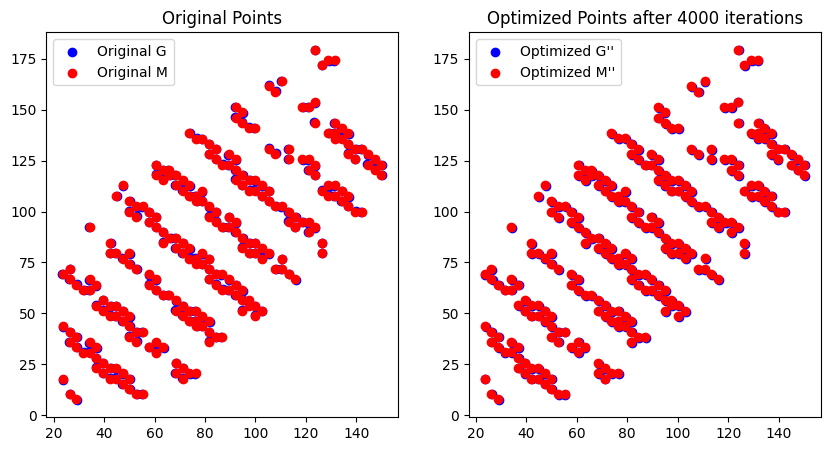

Iteration 4000: Euclidean distance between G and M: 8.058124059903323


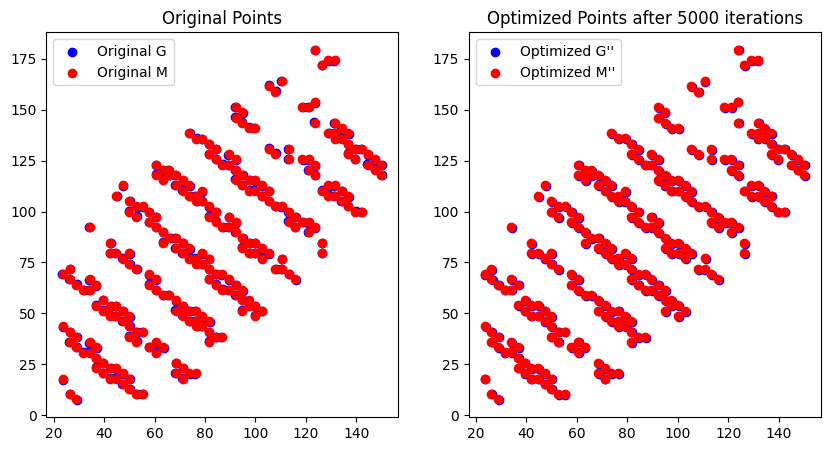

Iteration 5000: Euclidean distance between G and M: 8.058124059903323


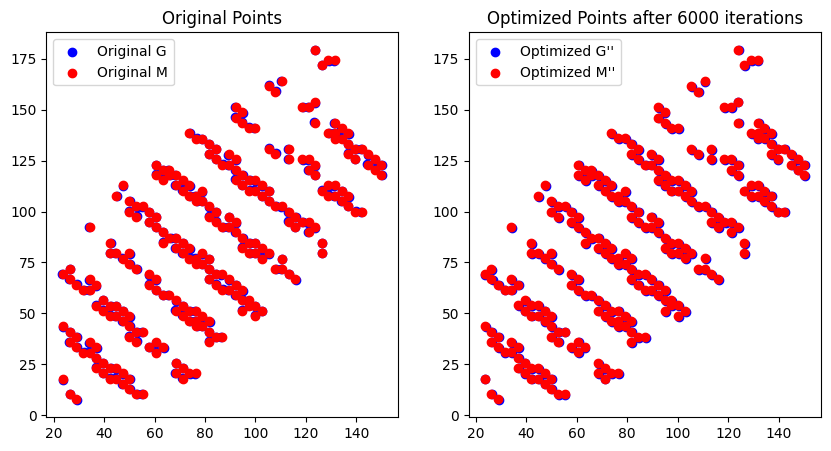

Iteration 6000: Euclidean distance between G and M: 8.058124059903323


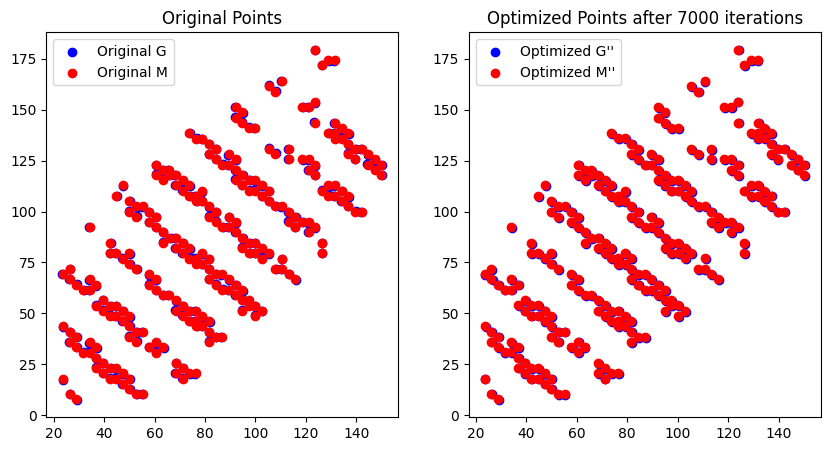

Iteration 7000: Euclidean distance between G and M: 8.058124059903323


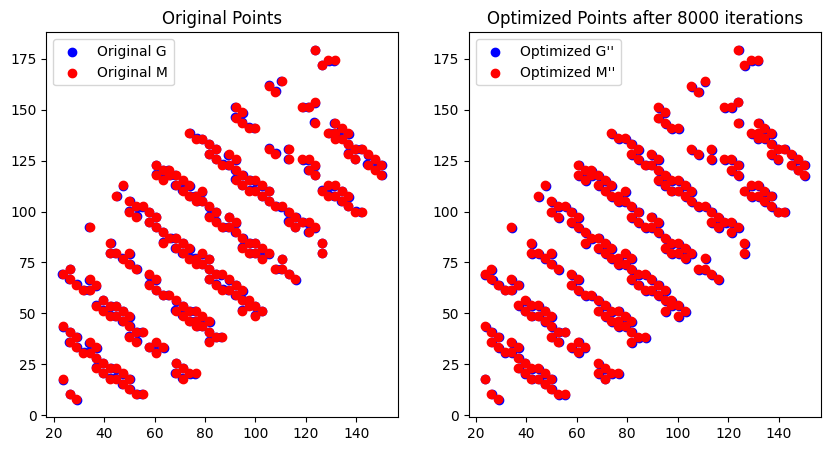

Iteration 8000: Euclidean distance between G and M: 8.058124059903323


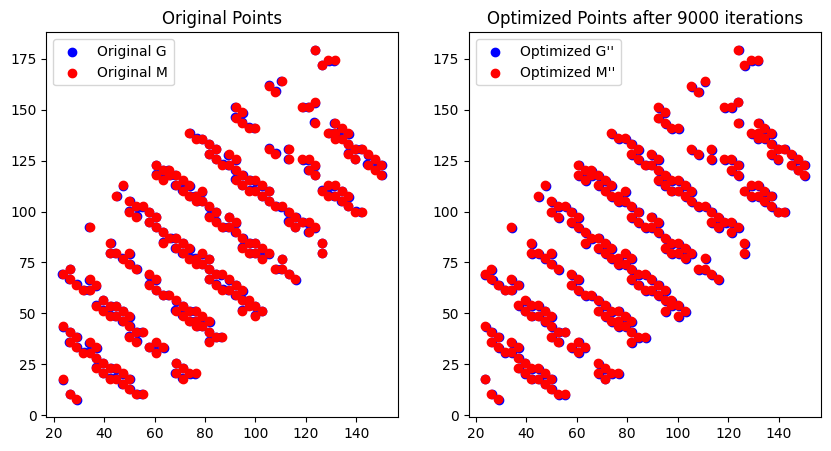

Iteration 9000: Euclidean distance between G and M: 8.058124059903323
: Euclidean distance between G' and M': 118.16462011328127
优化后的 f_G:
[[-0.97992088 -0.01888671  0.          0.          0.          0.
   0.          0.00753237  0.01307861  0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.01828327  0.          0.          0.
   0.          0.          0.          0.0155839   0.          0.
   0.          0.        ]
 [-0.01843319 -0.9789258   0.          0.          0.          0.
   0.         -0.0089092  -0.01971769  0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.         -0.05034698  0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.        ]]
优化后的 f_M:
[[147.36842105  73.68421053  23.68421053 136.84210526 118.42105263
   92.10526316  63.15789474  65.78947368 150.          50.
  100.    

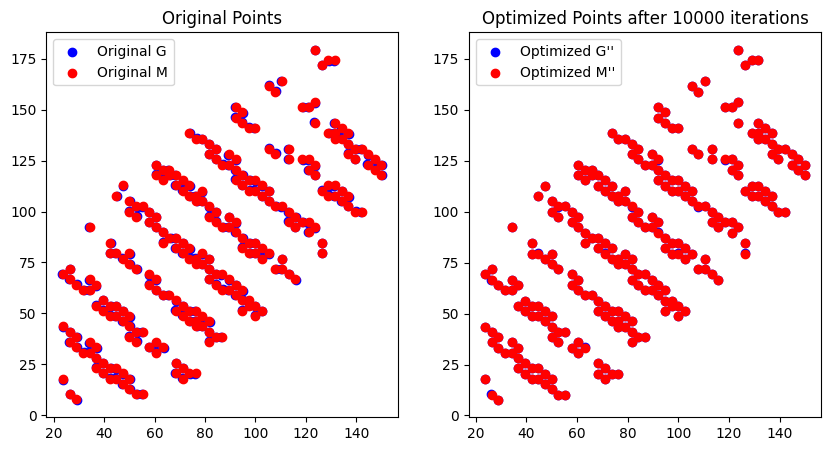

In [94]:
import numpy as np
import matplotlib.pyplot as plt
scaler = MinMaxScaler(feature_range=(-1, 1))
metabolic_select_high_corr_variant = convert_to_array(adata1.X)
metabolic_select_high_corr_variant = pd.DataFrame(metabolic_select_high_corr_variant)
metabolic_select_high_corr_variant = scaler.fit_transform(metabolic_select_high_corr_variant)
metabolic_select_high_corr_variant = pd.DataFrame(metabolic_select_high_corr_variant)
metabolic_select_high_corr_variant = metabolic_select_high_corr_variant.iloc[:,top_cols]
metabolic_select_high_corr_variant = pd.concat([data3_spatial_results, metabolic_select_high_corr_variant], axis=1)

spatial_select_high_corr_variant = convert_to_array(adata2.X)
spatial_select_high_corr_variant = pd.DataFrame(spatial_select_high_corr_variant)
spatial_select_high_corr_variant = scaler.fit_transform(spatial_select_high_corr_variant)
spatial_select_high_corr_variant = pd.DataFrame(spatial_select_high_corr_variant)
spatial_select_high_corr_variant = spatial_select_high_corr_variant.iloc[:,top_rows]
spatial_select_high_corr_variant = pd.concat([data2_spatial_results, spatial_select_high_corr_variant], axis=1)


# 假设G和M是已知的2xM矩阵
G = data2_spatial_results.T.iloc[:,spatial_ID_list].to_numpy()  # 示例数据
M = data3_spatial_results.T.iloc[:,metabolic_ID_list].to_numpy() # 示例数据

# 假设G'和M'是已知的nxM矩阵
G_prime = spatial_select_high_corr_variant.T.iloc[:,spatial_ID_list].to_numpy()  # 示例数据
M_prime = metabolic_select_high_corr_variant.T.iloc[:,metabolic_ID_list].to_numpy()  # 示例数据
print(G.shape, M.shape, G_prime.shape,M_prime.shape)
print(spatial_ID_list)
print(metabolic_ID_list)
# 初始化f_G和f_M为零矩阵
# 初始化f_G和f_M为零矩阵
f_G = np.zeros((G.shape[0], G_prime.shape[0]))
f_M = np.zeros((M.shape[0], M_prime.shape[0]))

# 定义学习率和迭代次数
alpha = 0.01
iterations = 10000
clip_value = 1.0  # 梯度裁剪阈值

# 目标函数的梯度计算
def compute_gradients(G, M, G_prime, M_prime, f_G):
    G_double_prime = G + f_G.dot(G_prime-M_prime)
    M_double_prime = M
    diff = G_double_prime - M_double_prime
    d_G = 2 * diff.dot(G_prime.T-M_prime.T)
    return d_G

def euclidean_distance(G, M):
    squared_diff = np.square(G - M)
    sum_squared_diff = np.sum(squared_diff)
    distance = np.sqrt(sum_squared_diff)
    return distance

# 可视化函数
def plot_matrices(G, M, G_double_prime, M_double_prime, iteration):
    plt.figure(figsize=(10, 5))

    # 原始点和优化后的点
    plt.subplot(1, 2, 1)
    plt.scatter(G[0, :], G[1, :], color='blue', label='Original G')
    plt.scatter(M[0, :], M[1, :], color='red', label='Original M')
    plt.title('Original Points')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.scatter(G_double_prime[0, :], G_double_prime[1, :], color='blue', label='Optimized G\'\'')
    plt.scatter(M_double_prime[0, :], M_double_prime[1, :], color='red', label='Optimized M\'\'')
    plt.title(f'Optimized Points after {iteration} iterations')
    plt.legend()

    plt.show()


# 迭代优化
for i in range(iterations):
    d_G = compute_gradients(G, M, G_prime, M_prime, f_G)
    
    # 梯度裁剪
    d_G = np.clip(d_G, -clip_value, clip_value)
    
    f_G -= alpha * d_G

    # 每100次迭代进行一次可视化
    if i % 1000 == 0:
        G_double_prime = G + f_G.dot(G_prime-M_prime)
        M_double_prime = M 
        plot_matrices(G, M, G_double_prime, M_double_prime, i)
        distance = euclidean_distance(G_double_prime, M_double_prime)
        print(f"Iteration {i}: Euclidean distance between G and M:", distance)

print(f": Euclidean distance between G' and M':", euclidean_distance(G_prime, M_prime))
# 优化后的f_G和f_M
print("优化后的 f_G:")
print(f_G)
print("优化后的 f_M:")
print(M)

# 计算最终的 G'' 和 M''
G_double_prime = G + f_G.dot(G_prime-M_prime)
M_double_prime = M 

print("最终的 G'':")
print(G_double_prime)
print("最终的 M'':")
print(G)

# 最终结果可视化
plot_matrices(G, M, G_double_prime, M_double_prime, iterations)

In [95]:
X_c=pd.DataFrame(data1_spatial_results)
Y_c=pd.DataFrame(data2_spatial_results)
Z_c=pd.DataFrame(data3_spatial_results)
from scipy.spatial.distance import cdist
distances = cdist(Z_c, Y_c, metric='euclidean')
dist_df = pd.DataFrame(distances)
print(dist_df.shape)
min_row_indices = dist_df.idxmin()
print(Z_c.shape, Y_c.shape)
print(min_row_indices[1:10])

(3278, 2278)
(3278, 2) (2278, 2)
1    1023
2    2398
3    1145
4     804
5     613
6    2651
7    2387
8    1528
9    2767
dtype: int64


In [96]:
G_prime = spatial_select_high_corr_variant.T.to_numpy()  # 示例数据
M_prime = metabolic_select_high_corr_variant.T.to_numpy()  # 示例数据
G = data2_spatial_results + f_G.dot(G_prime-M_prime[:,min_row_indices]).T

C:\Users\28123\AppData\Local\Temp\ipykernel_16000\1743369896.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Z_C_['matabolic_ID'] = Z_C_.index
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


(3278, 2) (2278, 2)
(3278, 2278)
(3278, 2) (2278, 2)
(3278, 2) (2278, 2)
   spatial.CCA.X  spatial.CCA.Y  spatial_ID  spatial_cluster  spatial.CCA.Z  \
0      36.857812       7.674377           0                3             -1   
1     126.292016     117.961295           1                0             -1   
2      63.194945      12.785256           2                3             -1   
3     121.045178     143.598371           3                1             -1   
4     136.870527     105.105774           4                7             -1   

   metabolic.CCA.X  metabolic.CCA.Y  matabolic_ID  matabolic_cluster  \
0        36.842105         7.692308          2905                  2   
1       126.315789       117.948718          1023                  2   
2        63.157895        12.820513          2398                  1   
3       121.052632       143.589744          1145                  2   
4       136.842105       105.128205           804                  2   

   matabolic.CCA.Z 

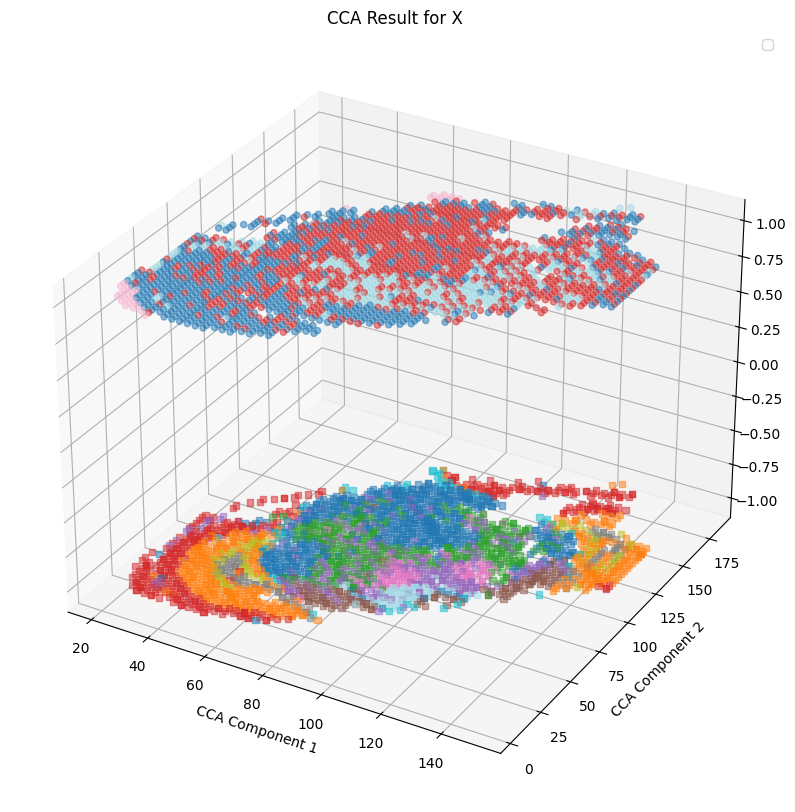

In [97]:
Y_c = G
Z_c = data3_spatial_results
print(Z_c.shape, Y_c.shape)
from scipy.spatial.distance import cdist
distances = cdist(Z_c, Y_c, metric='euclidean')
dist_df = pd.DataFrame(distances)
print(dist_df.shape)
min_row_indices = dist_df.idxmin()
print(Z_c.shape, Y_c.shape)
###############找出Y_C(spatial)周围dist_min以内的Z_C(metabolic)点
Y_C_ = Y_c.iloc[:,:]
Y_C_['spatial_ID'] = Y_C_.index
Y_C_ = Y_C_.reset_index()
Y_C_["spatial_cluster"] = data2_leiden_str.astype(int)
Y_C_["spatial.CCA.Z"] = -1
Y_C_ = Y_C_.drop(columns=['index'])
Y_C_ = Y_C_.rename(columns={0: "spatial.CCA.X", 1:"spatial.CCA.Y"})
print(Z_c.shape, Y_c.shape)
Z_C_=Z_c.iloc[min_row_indices,]
Z_C_['matabolic_ID'] = Z_C_.index
Z_C_=Z_C_.reset_index()
Z_C_["matabolic_cluster"] = data1_leiden_str[min_row_indices].astype(int)
Z_C_=Z_C_.drop(columns=['index'])
Z_C_["matabolic.CCA.Z"] = 1
Z_C_=Z_C_.rename(columns={0: "metabolic.CCA.X", 1:"metabolic.CCA.Y"})
pairs = pd.concat([Y_C_,Z_C_],axis=1)
#pairs["distance"] = dist_df.iloc[row_indices,col_indices].values.diagonal()  //diagonal要求内存过大
print(pairs.head())

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
plt.scatter(Z_c.iloc[unique_row_indices, 0], Z_c.iloc[unique_row_indices, 1],zs=1, c=data1_leiden_str[unique_row_indices].astype(int), cmap='tab20', s=20, alpha=0.5)
plt.scatter(Y_c.iloc[:, 0], Y_c.iloc[:, 1],zs=-1, c=data2_leiden_str.astype(int), cmap='tab20', s=20, alpha=0.5,marker='s')
#for i in range(0,pairs.shape[0]):
#    plt.plot(pairs.iloc[i,[0,5]], pairs.iloc[i,[1,6]], pairs.iloc[i,[4,9]], 'gray', linewidth=0.2)
plt.xlabel('CCA Component 1')
plt.ylabel('CCA Component 2')
plt.title('CCA Result for X')
plt.legend()
plt.show()

In [98]:
pairs

spatial.CCA.X  spatial.CCA.Y  spatial_ID  spatial_cluster  \
0         36.857812       7.674377           0                3   
1        126.292016     117.961295           1                0   
2         63.194945      12.785256           2                3   
3        121.045178     143.598371           3                1   
4        136.870527     105.105774           4                7   
...             ...            ...         ...              ...   
2273      63.170177      56.395067        2273                0   
2274      86.799028      58.998010        2274                2   
2275      26.296684      56.426372        2275                3   
2276      99.957461      74.384928        2276                4   
2277      71.059560      20.498734        2277                1   

      spatial.CCA.Z  metabolic.CCA.X  metabolic.CCA.Y  matabolic_ID  \
0                -1        36.842105         7.692308          2905   
1                -1       126.315789       117.948718          1023   
2                -1        63.157895        12.820513          2398   
3                -1       121.052632       143.589744          1145   
4                -1       136.842105       105.128205           804   
...             ...              ...              ...           ...   
2273             -1        63.157895        56.410256          2415   
2274             -1        86.842105        58.974359          1885   
2275             -1        26.315789        56.410256          3078   
2276             -1       100.000000        74.358974          1585   
2277             -1        71.052632        20.512821          2231   

      matabolic_cluster  matabolic.CCA.Z  
0                     2                1  
1                     2                1  
2                     1                1  
3                     2                1  
4                     2                1  
...                 ...              ...  
2273                  2                1  
2274                  4                1  
2275                  1                1  
2276                  4                1  
2277                  1                1  

[2278 rows x 10 columns]

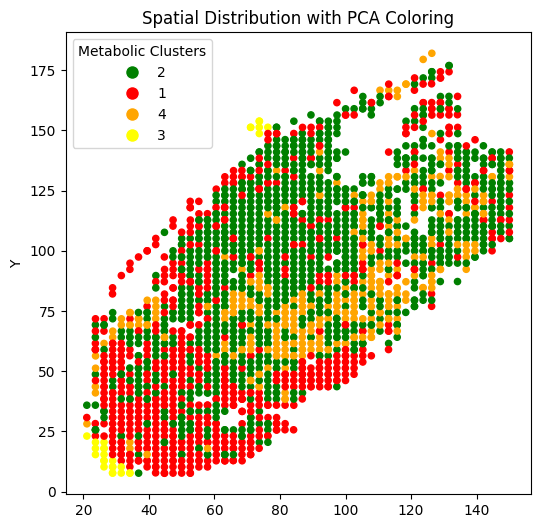

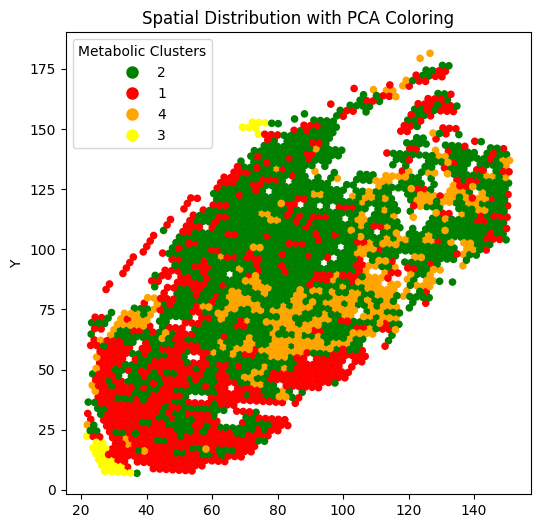

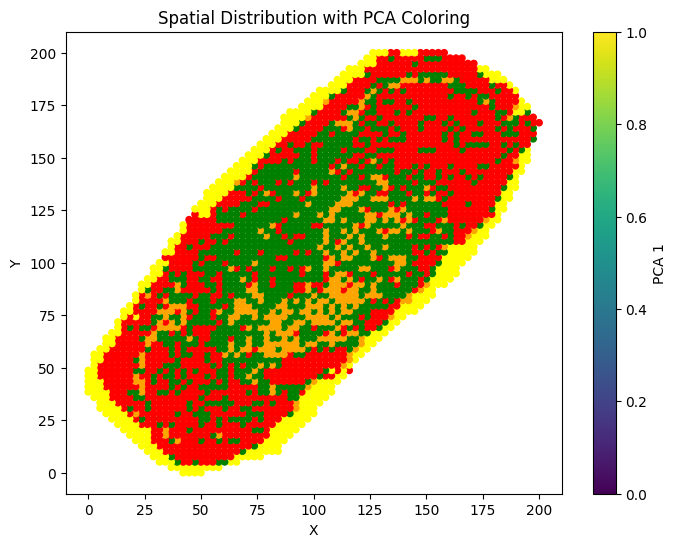

In [99]:
plt.figure(figsize=(6, 6))
plt.scatter(G.iloc[:, 0],G.iloc[:, 1], 
            c=[color_mapping[category] for category in pairs["matabolic_cluster"].tolist()], s=20, alpha=1)
plt.ylabel('Y')
plt.title('Spatial Distribution with PCA Coloring')
unique_categories = pairs["matabolic_cluster"].unique()
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color_mapping[cat], markersize=10) for cat in unique_categories]
plt.legend(handles, unique_categories, title="Metabolic Clusters")
plt.savefig("I:\\mutiomics\\Spatial Multimodal Analysis of Transcriptomes and Metabolomes in Tissues\\m1\\anchor_merge_nearst_pair_after_SVD.pdf")
plt.show()
plt.figure(figsize=(6, 6))

plt.scatter(data2_spatial_results.iloc[:, 0],data2_spatial_results.iloc[:, 1], 
            c=[color_mapping[category] for category in pairs["matabolic_cluster"].tolist()], s=20, alpha=1)
plt.ylabel('Y')
plt.title('Spatial Distribution with PCA Coloring')
unique_categories = pairs["matabolic_cluster"].unique()
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color_mapping[cat], markersize=10) for cat in unique_categories]
plt.legend(handles, unique_categories, title="Metabolic Clusters")
plt.savefig("I:\\mutiomics\\Spatial Multimodal Analysis of Transcriptomes and Metabolomes in Tissues\\m1\\groundtruth.pdf")
plt.show()

plt.figure(figsize=(8, 6))
plt.scatter(data3_spatial_results.iloc[:, 0], data3_spatial_results.iloc[:, 1], c=[color_mapping[category] for category in data1_leiden_str.astype(int)], s=20, alpha=1)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Spatial Distribution with PCA Coloring')
plt.colorbar(label='PCA 1')
plt.show()

In [100]:
pairs.to_csv("I:\\mutiomics\\Spatial Multimodal Analysis of Transcriptomes and Metabolomes in Tissues\\m1\\groundtruth.csv", index=False)

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6, 6))
plt.scatter(data3_spatial_results.iloc[:, 0], data3_spatial_results.iloc[:, 1], c=data1_leiden_str.astype(int), cmap='tab20', s=20, alpha=0.5)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Spatial Distribution with PCA Coloring')
unique_categories =np.unique(data1_leiden_str.astype(int))
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color_mapping[cat], markersize=10) for cat in unique_categories]
plt.legend(handles, unique_categories, title="metabolic Clusters")
plt.savefig("I:\\mutiomics\\Spatial Multimodal Analysis of Transcriptomes and Metabolomes in Tissues\\m3\\metabolic.pdf")
plt.show()
plt.figure(figsize=(6, 6))
plt.scatter(data2_spatial_results.iloc[:, 0], data2_spatial_results.iloc[:, 1], c=data2_leiden_str.astype(int), cmap='tab20', s=20, alpha=0.5)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Spatial Distribution with PCA Coloring')
unique_categories =np.unique(data2_leiden_str.astype(int))
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color_mapping[cat], markersize=10) for cat in unique_categories]
plt.legend(handles, unique_categories, title="transcript Clusters")
plt.savefig("I:\\mutiomics\\Spatial Multimodal Analysis of Transcriptomes and Metabolomes in Tissues\\m3\\transcript.pdf")
plt.show()